# Project - Used Car Prices in United States

## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.


## Topic 

I would like to better understand how different variables influence the price of used vehicles.
During COVID-19 supply problems, used car prices increased significantly when new car availability decreased which caused some of my curiousity in this area.

Additionally, I have always been interested in cars overall, and have bought and sold a number of older and sometimes antique vehicles, and it would be of practical use to be better able to understand what is a fair price.

This purpose is also applicable to user car vendors, consumers selling their used vehicles privately or as trade-ins, new car dealerships purchasing trade-in vehicles, and car information websites such as [edmunds.com](http://www.edmunds.com) and [Kelly Blue Book](http://www.kbb.com) that provide price range information for vehicles based on vehicle details.

I want to investigate what factors influence used car prices compared to the obvious ones of age and odomoter mileage. I also want to understand other relationships between variables such as how much make and model affects the price for different age vehicles compared to the condition, or how much location affects the price of similar vehicles.

I am interested exploring a regression problem on tabular data with different types of input features since I have more experience to date with classification.

I think this is a good topic to expand my experience with visualization techniques, gain experience with practical data preparation, and practice using relevant libraries and frameworks, especially scikit-learn, Pandas, and XGBoost.

Particular techniques I want to investigate in part two of this project are

- Basic regression techniques for this problem, such as linear, ridge and lasso regression
- Regression using ensemble models, such as Random Cut Forest and XGBoost
- Feature selection techniques.
    - Using Random Forest and/or XGBoost model to evaluate feature importance.

In addition to the already described objectives, if time permits, I plan to choose the best performing regression model and embed it into a [Streamlit](https://streamlit.io/) project to create a web tool which can take a set of inputs and predict the price of a used car.


## Datasets Available

There are a number of datasets available related to used cars listing or sales. They have different features, different sizes of samples and some are more prepared and preprocessed than others.

These relevant datasets located include:

- **Cargurus:** <https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset>
    - This dataset contains rows with 66 columns for three million user car listings.
    - This dataset was created from Cargurus inventory in September 2020 using a crawler built by the owner of the Kaggle dataset.
- **TrueCar:** https://www.kaggle.com/datasets/jpayne/852k-used-car-listings
    - The provider created this dataset by scraping TrueCar.com for used car listings on 9/24/2017.
    - Columns include year, make, model, price, VIN, city, state
- **Craigslist:** https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
    - This dataset was created by the provider scraping data from Craigslist car listings.
    - The columns include price, condition, manufacturer, and latitude/longitude plus 18 other categories.
- **Carvana:** https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices
    - This data is based on Carvana car sales, and only contains about 22,000 rows with four columns.
- **USDOT:** https://catalog.data.gov/dataset/auto-sales
    - This is available through the government bts.gov system at <https://data.bts.gov/Research-and-Statistics/Auto-Sales/7n6a-n5tz>. It seems to be primarily a historic aggregate time series of new car sales in the USA. It is part of the monthly transportation statistics published by the US Department of Transportation. It does not seem very useful to the objectives of this project. It does provide some contextual timeseries data for volume of new cars to compare against used car prices by year.

Before completing exploratory data analysis it seems likely that the Cargurus and/or Craigslist datasets would be most useful for this analysis, but this also depends on the quality of the data and effort required to prepare it within the available time so the final choice will be based on the phase one report.


## Analysis of Datasets

### Note on Datasets

*Note* that the code in the cells below will not run unless the data is downloaded and unzipped in advance.

The code expects a dataset directory with the following structure:

```bash
% find datasets -name '*.csv' -or -type d
datasets
datasets/cargurus
datasets/cargurus/used_cars_data.csv
datasets/truecar
datasets/truecar/true_car_listings.csv
datasets/craigslist
datasets/craigslist/vehicles.csv
datasets/carvana
datasets/carvana/carvana.csv
datasets/usdot
datasets/usdot/Monthly_Transportation_Statistics.csv
```

ALl of the CSV filenames are the original names from the ZIP filenames at the Kaggle URLs listed in the cell above.

### Size of Datasets

```bash
% find . -name '*.csv' | xargs wc -l
 3000599 ./datasets/cargurus/used_cars_data.csv
 1233043 ./datasets/truecar/tc20171021.csv
  852123 ./datasets/truecar/true_car_listings.csv
  426881 ./datasets/craigslist/vehicles.csv
   22001 ./datasets/carvana/carvana.csv
     914 ./datasets/usdot/Monthly_Transportation_Statistics.csv
```


## New Car Sales vs Used Cars

Since the US DOT data from bts.gov is an aggregate, monthly timeseries it will not directly help in our regression problem. This is even more true because no datasets were located that contain samples of used car prices over different points in time, rather than a point in time snapshot, so there is no way with the data we found to investigate relationships over time between new car sales and used car prices.

The graph below from the bts.gov based on data collected by the US Department of transportation shows new car sales volume by month.
![Monthly new car sales](images/monthly_new_car_sales.png)

## Exploratory Data Analysis 

An analysis of the characteristics of one of the datasets is shown below using the included code cells and outputs with visualizations.

The code is structured so that the majority of it can be, and was, used to investigate and visualize the data from all four of the used car datasets.  However, for reasons discussed in our summary and brevity, we only include the results for the Craigslist dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random

In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))
    

In [5]:
# This is the configuration for each dataset.
# We drop any columns which are obviously not going to be useful to use for data analysis or regression upon load,
# For example, VIN numbers and URLs to images.

# TODO: turn off sampling for final runs

# we also rename some columns from datasets for consistency (make, model)

datasets = {
    'carvana': {
        'title': "Carvana",
        'path': "datasets/carvana/carvana.csv",
        'sample': False,
        'drop_cols': []
    },
    'craigslist': {
        'title': "Craigslist",
        'path': "datasets/craigslist/vehicles.csv",
        'sample': True,
        'rename_cols': {'manufacturer': 'make'},
        'drop_cols': ['id','url','region','VIN','region_url','county','lat','long','description','image_url','posting_date']
    },
    'cargurus': {
        'title': "Cargurus",
        'path': "datasets/cargurus/used_cars_data.csv",
        'sample': True,
        'rename_cols': {'mileage': 'odometer', 'make_name': 'make', 'model_name': 'model'},
        'drop_cols': [
            'vin', 'description', 'listing_id', 'major_options',
            'wheel_system','trimId', 'sp_id', 'main_picture_url',
            'latitude', 'longitude',
            'is_certified', 'combine_fuel_economy', 'vehicle_damage_category'
        ]
    },
    'truecar': {
        'title': "TrueCar",
        'path': "datasets/truecar/true_car_listings.csv",
        'sample': True,
        'drop_cols': ['Vin']
    }
}

In [6]:
# NOTE: This is where you select the dataset.

use_dataset = 'cargurus'
#use_dataset = 'craigslist'
#use_dataset = 'carvana'
#use_dataset = 'truecar'

dataset = datasets[use_dataset]
dataset_title = dataset['title']
ds_path = dataset['path']


In [7]:

if dataset['sample']:
    p = 0.01  # Keep 1% of the data for faster experimentation in phase 1.
    orig_df = pd.read_csv(
         ds_path,
         header=0, 
         low_memory=False,
         skiprows=lambda i: i>0 and random.random() > p
    )
else:
    orig_df = pd.read_csv(ds_path, low_memory=False)

In [8]:
def describe_col(colname, df):
    show_heading("Column: {}".format(colname))

    if is_numeric_dtype(df[colname]):    
        print("Numeric")
        if df[colname].dtype == 'int64':
            fmt = "{0:.0f}"
        else:
            fmt = "{0:.5f}"
    else:
        if is_string_dtype(df[colname]):
            print("String")
        else:
            print("Other")
        fmt = "{}"
    d = df[colname].describe().apply(fmt.format)
    display(d)
    uvals = df[colname].unique()
    #value_counts()
    print("unique_values(max 10):")
    
    display(uvals[:10])
    
    

In [9]:
def describe_data(title, df, verbose=True):
    show_heading("Dataset Name: {}".format(title), size='1')

    show_heading("Info", size=3)
    print("Shape:", df.shape)
    display(df.info())
    
    show_heading("Sample", size=3)
    pd.set_option('display.max_columns', None)
    display(df.head())
    
    show_heading("Types", size=3)
    display(df.dtypes)

    show_heading("Null Proportion", size=3)
    null_ratio = df.isnull().sum()/len(df.index)
    display(null_ratio)
    print("Null Counts")
    display(df.isnull().sum().sort_values())

    if verbose:
        for colname in df.columns:
            describe_col(colname, df)

In [10]:
# Drop any columns we don't want and set df var.
df = orig_df

print("Original Columns:", df.columns)



if dataset['drop_cols']:
    print("Dropping:")
    display(dataset['drop_cols'])
    df = orig_df.drop(columns=dataset['drop_cols'])
    

# Rename any columns as needed.
if 'rename_cols' in dataset and dataset['rename_cols']:
    print("Renaming:")
    display(dataset['rename_cols'])
    df = df.rename(columns=dataset['rename_cols'])

print("Using Columns:", df.columns)

Original Columns: Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_dama

['vin',
 'description',
 'listing_id',
 'major_options',
 'wheel_system',
 'trimId',
 'sp_id',
 'main_picture_url',
 'latitude',
 'longitude',
 'is_certified',
 'combine_fuel_economy',
 'vehicle_damage_category']

Renaming:


{'mileage': 'odometer', 'make_name': 'make', 'model_name': 'model'}

Using Columns: Index(['back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type', 'cabin',
       'city', 'city_fuel_economy', 'daysonmarket', 'dealer_zip',
       'engine_cylinders', 'engine_displacement', 'engine_type',
       'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'has_accidents', 'height', 'highway_fuel_economy', 'horsepower',
       'interior_color', 'isCab', 'is_cpo', 'is_new', 'is_oemcpo', 'length',
       'listed_date', 'listing_color', 'make', 'maximum_seating', 'odometer',
       'model', 'owner_count', 'power', 'price', 'salvage', 'savings_amount',
       'seller_rating', 'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trim_name', 'wheel_system_display',
       'wheelbase', 'width', 'year'],
      dtype='object')


In [11]:
# Describe the dataset.
describe_data(dataset_title, df, verbose=False)

Dataset Name: Cargurus

Info

Shape: (29767, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   back_legroom          28209 non-null  object 
 1   bed                   200 non-null    object 
 2   bed_height            4237 non-null   object 
 3   bed_length            4237 non-null   object 
 4   body_type             29649 non-null  object 
 5   cabin                 625 non-null    object 
 6   city                  29767 non-null  object 
 7   city_fuel_economy     24832 non-null  float64
 8   daysonmarket          29767 non-null  int64  
 9   dealer_zip            29767 non-null  object 
 10  engine_cylinders      28768 non-null  object 
 11  engine_displacement   28065 non-null  float64
 12  engine_type           28768 non-null  object 
 13  exterior_color        29766 non-null  object 
 14  fleet                 15633 non-null  object 
 15  

None

Sample

back_legroom  bed bed_height bed_length        body_type cabin  \
0      39.6 in  NaN        NaN        NaN  SUV / Crossover   NaN   
1      35.3 in  NaN        NaN        NaN  SUV / Crossover   NaN   
2      38.4 in  NaN        NaN        NaN  SUV / Crossover   NaN   
3      36.1 in  NaN        NaN        NaN            Sedan   NaN   
4      33.2 in  NaN        NaN        NaN            Sedan   NaN   

           city  city_fuel_economy  daysonmarket dealer_zip  \
0       Bayamon                NaN           529      00960   
1        Linden                NaN            47      07036   
2     Bay Shore               17.0            11      11706   
3     Bay Shore               12.0             6      11706   
4  Little Ferry                NaN            11      07643   

       engine_cylinders  engine_displacement           engine_type  \
0                    I4               2500.0                    I4   
1                   NaN               4700.0                   NaN   
2                    V6               3600.0                    V6   
3                    V8               6200.0                    V8   
4  I4 Flex Fuel Vehicle               2000.0  I4 Flex Fuel Vehicle   

          exterior_color  fleet frame_damaged  franchise_dealer  \
0                   GRIS    NaN           NaN              True   
1                   None  False         False             False   
2      Graphite Metallic  False         False              True   
3  Black Diamond Tricoat  False         False              True   
4                    Red   True         False             False   

  franchise_make front_legroom fuel_tank_volume          fuel_type  \
0           Jeep         41 in         15.3 gal           Gasoline   
1            NaN       41.4 in           20 gal                NaN   
2      Chevrolet         41 in         21.7 gal           Gasoline   
3       Cadillac       42.4 in           18 gal           Gasoline   
4            NaN       43.7 in         12.4 gal  Flex Fuel Vehicle   

  has_accidents   height  highway_fuel_economy  horsepower interior_color  \
0           NaN  66.1 in                   NaN       187.0          Black   
1         False  69.4 in                   NaN       235.0           None   
2         False  70.7 in                  25.0       310.0      Jet Black   
3         False  57.3 in                  18.0       556.0  Black (Ebony)   
4          True  57.7 in                   NaN       160.0          Black   

   isCab is_cpo  is_new is_oemcpo    length listed_date listing_color  \
0    NaN    NaN    True       NaN  179.1 in  2019-03-30          GRAY   
1  False    NaN   False       NaN  181.5 in  2020-07-24       UNKNOWN   
2  False    NaN   False       NaN  204.3 in  2020-08-29       UNKNOWN   
3  False    NaN   False       NaN  191.3 in  2020-09-03         BLACK   
4   True    NaN   False       NaN  178.5 in  2020-08-29           RED   

        make maximum_seating  odometer           model  owner_count  \
0      Mazda         5 seats       5.0            CX-5          NaN   
1       Jeep         5 seats  166069.0  Grand Cherokee          3.0   
2  Chevrolet         8 seats   31895.0        Traverse          1.0   
3   Cadillac         5 seats   25813.0           CTS-V          2.0   
4       Ford         5 seats   88763.0           Focus          2.0   

                power    price salvage  savings_amount  seller_rating  \
0  187 hp @ 6,000 RPM  35695.0     NaN               0       2.800000   
1  235 hp @ 4,800 RPM   2499.0   False               0       4.666667   
2  310 hp @ 6,800 RPM  28572.0   False             431       3.447761   
3  556 hp @ 6,100 RPM  45949.0   False              54       3.447761   
4  123 hp @ 6,350 RPM   6750.0   False            1632       3.577778   

                       sp_name theft_title                 torque  \
0            Flagship Chrysler         NaN  186 lb-ft @ 4,000 RPM   
1                  Auto Legend       False  295 lb-ft @ 3,200 R

Types

back_legroom             object
bed                      object
bed_height               object
bed_length               object
body_type                object
cabin                    object
city                     object
city_fuel_economy       float64
daysonmarket              int64
dealer_zip               object
engine_cylinders         object
engine_displacement     float64
engine_type              object
exterior_color           object
fleet                    object
frame_damaged            object
franchise_dealer           bool
franchise_make           object
front_legroom            object
fuel_tank_volume         object
fuel_type                object
has_accidents            object
height                   object
highway_fuel_economy    float64
horsepower              float64
interior_color           object
isCab                    object
is_cpo                   object
is_new                     bool
is_oemcpo                object
length                   object
listed_d

Null Proportion

back_legroom            0.052340
bed                     0.993281
bed_height              0.857661
bed_length              0.857661
body_type               0.003964
cabin                   0.979004
city                    0.000000
city_fuel_economy       0.165788
daysonmarket            0.000000
dealer_zip              0.000000
engine_cylinders        0.033561
engine_displacement     0.057177
engine_type             0.033561
exterior_color          0.000034
fleet                   0.474821
frame_damaged           0.474821
franchise_dealer        0.000000
franchise_make          0.192562
front_legroom           0.052340
fuel_tank_volume        0.052340
fuel_type               0.028018
has_accidents           0.474821
height                  0.052340
highway_fuel_economy    0.165788
horsepower              0.057177
interior_color          0.000034
isCab                   0.474821
is_cpo                  0.940202
is_new                  0.000000
is_oemcpo               0.956966
length    

Null Counts


year                        0
listed_date                 0
listing_color               0
make                        0
model                       0
price                       0
franchise_dealer            0
savings_amount              0
sp_name                     0
is_new                      0
daysonmarket                0
dealer_zip                  0
city                        0
exterior_color              1
interior_color              1
body_type                 118
seller_rating             442
transmission_display      655
transmission              655
fuel_type                 834
engine_type               999
engine_cylinders          999
trim_name                1151
wheel_system_display     1469
odometer                 1513
length                   1558
maximum_seating          1558
wheelbase                1558
back_legroom             1558
width                    1558
height                   1558
fuel_tank_volume         1558
front_legroom            1558
horsepower

In [12]:
# figure out which 'object' columns are really boolean with nulls.
from IPython.core.display import HTML
heading = lambda txt: display(HTML("<h3>" + txt + "</h3>"))



def col_is_bool(df, col):
    # only check a reasonable number of values
    # we don't want to count uniques of a numeric column for entire dataset.
    s = df[col].iloc[:1000]
    #display(s[:10])
    uv = df[col].dropna().unique()
    if len(uv) > 2:
        #print("too many unique values")
        #display(uv[:5])
        return False
    for val in uv:
        if val not in [True, False, 'True', 'False', 0, 1]:
            #print("value {} is not a valid boolean".format(val))
            return False
    #print("Column {} is boolean".format(col))
    return True;


def clean_bool_columns(df):
    df_bool_cleaned = df.copy()
    
    bool_col_map = {}
    cols = df.columns

    for col in cols:
        #heading("Checking type of column {}:".format(col))
        #display(df[col].notna().unique())
        is_bool = col_is_bool(df, col)
        bool_col_map[col] = is_bool
        if is_bool:
            # convert to actual boolean
            # fill null with mode
            df[col] = df[col].fillna(df[col].mode())
            df_bool_cleaned[col] = df[col].map(
                {'True': True, 'False': False, 1: True, 0: False}
            ).astype('bool')
            print("Converted column {} to bool, dtype: {}".format(col, df_bool_cleaned[col].dtype))
            #display(df_bool_cleaned[col])
            #display(df_bool_cleaned[col].value_counts())
    
    #display(bool_col_map)
 
    boolean_cols = [c for c, v in bool_col_map.items() if v is True]
    heading("Boolean columns:")
    display(boolean_cols)

    return df_bool_cleaned
    





In [13]:
def show_pair_plots(df):
    show_heading("Pair Plots")

    # Skip boolean columns
    bcols = []
    use_cols = []
    for colname in df.columns:
        if col_is_bool(df, colname):
            bcols.append(colname)
        else: 
            use_cols.append(colname)
    #df = df.drop(columns=bcols)
    
    g = sns.pairplot(df[use_cols], diag_kind='hist', height=2.5);

    plt.show()

In [14]:
import warnings

def show_bool_col_plots(df):
    show_heading("Boolean Columns")
    colnames = [c for c in df.columns if col_is_bool(df, c)]    
    df = df[colnames]

    # fill missing values with a marker for missing
    df = df.fillna(2)
    
    for col in colnames:
        df[col] = df[col].map(
                    {'True': 1, 'False': 0, True: 1, False: 0, 2: 2}
                )
    
    df_long = df.melt(
        value_vars=colnames, value_name='Legend').replace(
        {'Legend': 
             {0: 'True', 1: 'False', 2: 'Null'}
        })

    sns.set_style('whitegrid')
    with warnings.catch_warnings():
        # quiet warning about layout engine.
        warnings.simplefilter('ignore')

        g = sns.catplot(kind='count', data=df_long,
                        x='variable', hue='Legend', hue_order=['True', 'False', 'Null'],
                        palette='Set2')
        g.figure.set_size_inches((11,7))
    
        g.set(xlabel='')
        for ax in g.axes.flat:
            for bars in ax.containers:
                ax.bar_label(bars)
    
    plt.xticks(
        rotation=-45, 
        horizontalalignment='left',
        fontweight='light',
        fontsize='large'  
    )

    
    sns.move_legend(g, "upper right")
    plt.show()


#show_bool_col_plots(df)

In [15]:
def zscore(data):
    mean = np.mean(data)
    stdev = np.std(data)
    
    standardized_data = (data - mean) / stdev
    
    return standardized_data

In [16]:
def show_col_box_plots(df, rescale=True):
    show_heading("Box Plots (normalized)" if rescale else "Box Plots")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn]) and not col_is_bool(df,cn)]

    
    # don't put more than 4 box plots in a column.
    n_cols = 4
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(12, n_rows * 5))
    
    df = df.copy()
    df = df.fillna(0)
 
    for idx, column in enumerate(columns_to_plot):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        
        data = df[column]
        if rescale:
            data = zscore(data)
        sns.boxplot(data=data, ax=axis) 
        axis.set_title(column)

    plt.tight_layout()
    plt.show()

In [17]:
def show_col_hist(df):
    show_heading("Histograms")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn]) and not pd.api.types.is_bool_dtype(df[cn])]

    n_cols = 4
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
    
    
    #fig, axes = plt.subplots(ncols=len(columns_to_plot))
    fig = plt.figure(figsize=(12, n_rows * 5))

    #for column, axis in zip(columns_to_plot, axes):
    for idx, column in enumerate(columns_to_plot):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        sns.histplot(data=df[column], kde=True, ax=axis, bins=20)
        axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [18]:
def show_bar_plots(df):
    colnames = [cn for cn in df.columns if not is_numeric_dtype(df[cn]) or pd.api.types.is_bool_dtype(df[cn])]

    n_uniq = df[colnames].nunique()

    #show_heading("Column unique counts", size=4)
    #print([(c,n) for c,n in zip(colnames, n_uniq)])

    MAX_BAR_VALUES = 50
    keeping = [c for c,n in zip(colnames, n_uniq) if n <= MAX_BAR_VALUES]
    topn_colnames = [c for c,n in zip(colnames, n_uniq) if n > MAX_BAR_VALUES]
    
    counts = {c: n for c,n in zip(colnames, n_uniq)}

    if len(colnames) == 0:
        return
    show_heading("Bar Charts")
   
    n_cols = 2
    n_rows = (len(colnames) + n_cols - 1) // n_cols
    
    
    fig = plt.figure(figsize=(12, n_rows * 7))
    for idx, column in enumerate(colnames):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        
        data = df[column]
            
        if counts[column] > MAX_BAR_VALUES:
            g = sns.countplot(y=data, ax=axis, order=pd.value_counts(df[column]).iloc[:MAX_BAR_VALUES].index)
            axis.set_title("Top {}: {}".format(MAX_BAR_VALUES, column))
        else:
            data = df[column]
            g = sns.countplot(y=data, ax=axis)
            axis.set_title(column)
        
    plt.suptitle("Categorical Features")
    
    plt.rcParams['figure.constrained_layout.use'] = True

    plt.show()


In [19]:
def show_correlation(df, show_heatmap=True):
    show_heading("Correlation Heatmap")  

    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            #print("norm:", colname)
            df[colname] = zscore(df[colname])
        else:
            #print("cat:", colname)
            df[colname] = df[colname].astype("category").cat.codes
    
    display(df.corr(numeric_only=False))
    if show_heatmap:
        sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1) #, annot=True)
        plt.show()


Correlation Heatmap

back_legroom       bed  bed_height  bed_length  \
back_legroom              1.000000 -0.023829    0.226886    0.163940   
bed                      -0.023829  1.000000    0.155173    0.155008   
bed_height                0.226886  0.155173    1.000000    0.900734   
bed_length                0.163940  0.155008    0.900734    1.000000   
body_type                 0.159778 -0.045271   -0.262922   -0.238927   
cabin                    -0.031031  0.412633    0.269490    0.277222   
city                     -0.010648  0.010474   -0.016388   -0.015562   
city_fuel_economy        -0.219136 -0.054903   -0.271897   -0.259323   
daysonmarket             -0.028919  0.015864   -0.022184   -0.020497   
dealer_zip                0.008975  0.001395    0.025775    0.015825   
engine_cylinders          0.175607  0.093991    0.462393    0.449820   
engine_displacement       0.173166  0.123001    0.595608    0.620894   
engine_type               0.175607  0.093991    0.462393    0.449820   
exterior_color           -0.010288  0.017487    0.011161    0.018786   
fleet                    -0.048974  0.048007   -0.069020   -0.057905   
frame_damaged            -0.070766  0.065155   -0.048872   -0.035069   
franchise_dealer          0.115583 -0.138888    0.043737    0.023655   
franchise_make            0.024934 -0.081948   -0.029770   -0.041566   
front_legroom             0.332529 -0.018871    0.288647    0.269827   
fuel_tank_volume          0.381249  0.086617    0.563549    0.549414   
fuel_type                 0.192891 -0.052443   -0.204797   -0.262327   
has_accidents            -0.071652  0.069764   -0.048045   -0.033948   
height                    0.576393  0.066175    0.560359    0.531524   
highway_fuel_economy     -0.244915 -0.073247   -0.361439   -0.341614   
horsepower                0.211890  0.070494    0.522418    0.509348   
interior_color            0.009234 -0.003481    0.058263    0.070009   
isCab                    -0.041248  0.042733   -0.070576   -0.059874   
is_cpo                    0.010237 -0.019325   -0.049213   -0.046553   
is_new                    0.077590 -0.066817    0.056489    0.039302   
is_oemcpo                 0.024326 -0.016249   -0.023849   -0.024082   
length                    0.484432  0.087796    0.652172    0.617151   
listed_date               0.024270 -0.009666    0.024456    0.023595   
listing_color            -0.041212  0.012300    0.041063    0.047501   
make                     -0.067248  0.000366   -0.069204   -0.076499   
maximum_seating           0.685017 -0.020925    0.106583    0.094875   
odometer                 -0.093537  0.140874   -0.000306    0.022078   
model                    -0.077216 -0.003999   -0.032476   -0.016371   
owner_count              -0.148355  0.050463   -0.023554   -0.013745   
power                     0.281891  0.055887    0.423795    0.398788   
price                     0.086000 -0.028604    0.218986    0.202239   
salvage                  -0.072614  0.065381   -0.048519   -0.034296   
savings_amount           -0.042005  0.065712    0.042250    0.052333   
seller_rating            -0.009079  0.016663    0.011337    0.011365   
sp_name                  -0.000864 -0.003339    0.007437    0.006100   
theft_title              -0.071240  0.064000   -0.047964   -0.034170   
torque                    0.265680  0.070834    0.479835    0.455337   
transmission             -0.076094 -0.016529   -0.140211   -0.126093   
transmission_display      0.098239 -0.070764    0.003911   -0.012913   
trim_name                 0.257929  0.017221    0.213408    0.179672   
wheel_system_display      0.144683 -0.040402   -0.155296   -0.135733   
wheelbase                 0.299200  0.091195    0.644818    0.611423   
width                     0.380981  0.017199    0.324881    0.264994   
year                      0.183425 -0.107205    0.032905    0.012433   

                      body_type     cabin      city  city_fuel_economy  \
back_legroom           0.159778 -0.031031 -0.010648        

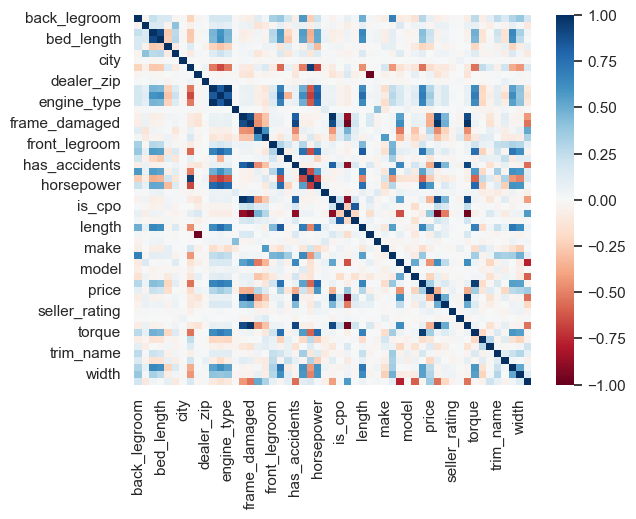

In [20]:
show_correlation(df, show_heatmap=True)

In [21]:
def visualize_data(title, df):
    show_col_box_plots(df, rescale=False)
    show_col_box_plots(df)
    show_col_hist(df)
    show_bar_plots(df)
    show_pair_plots(df)
    show_bool_col_plots(df)


Box Plots

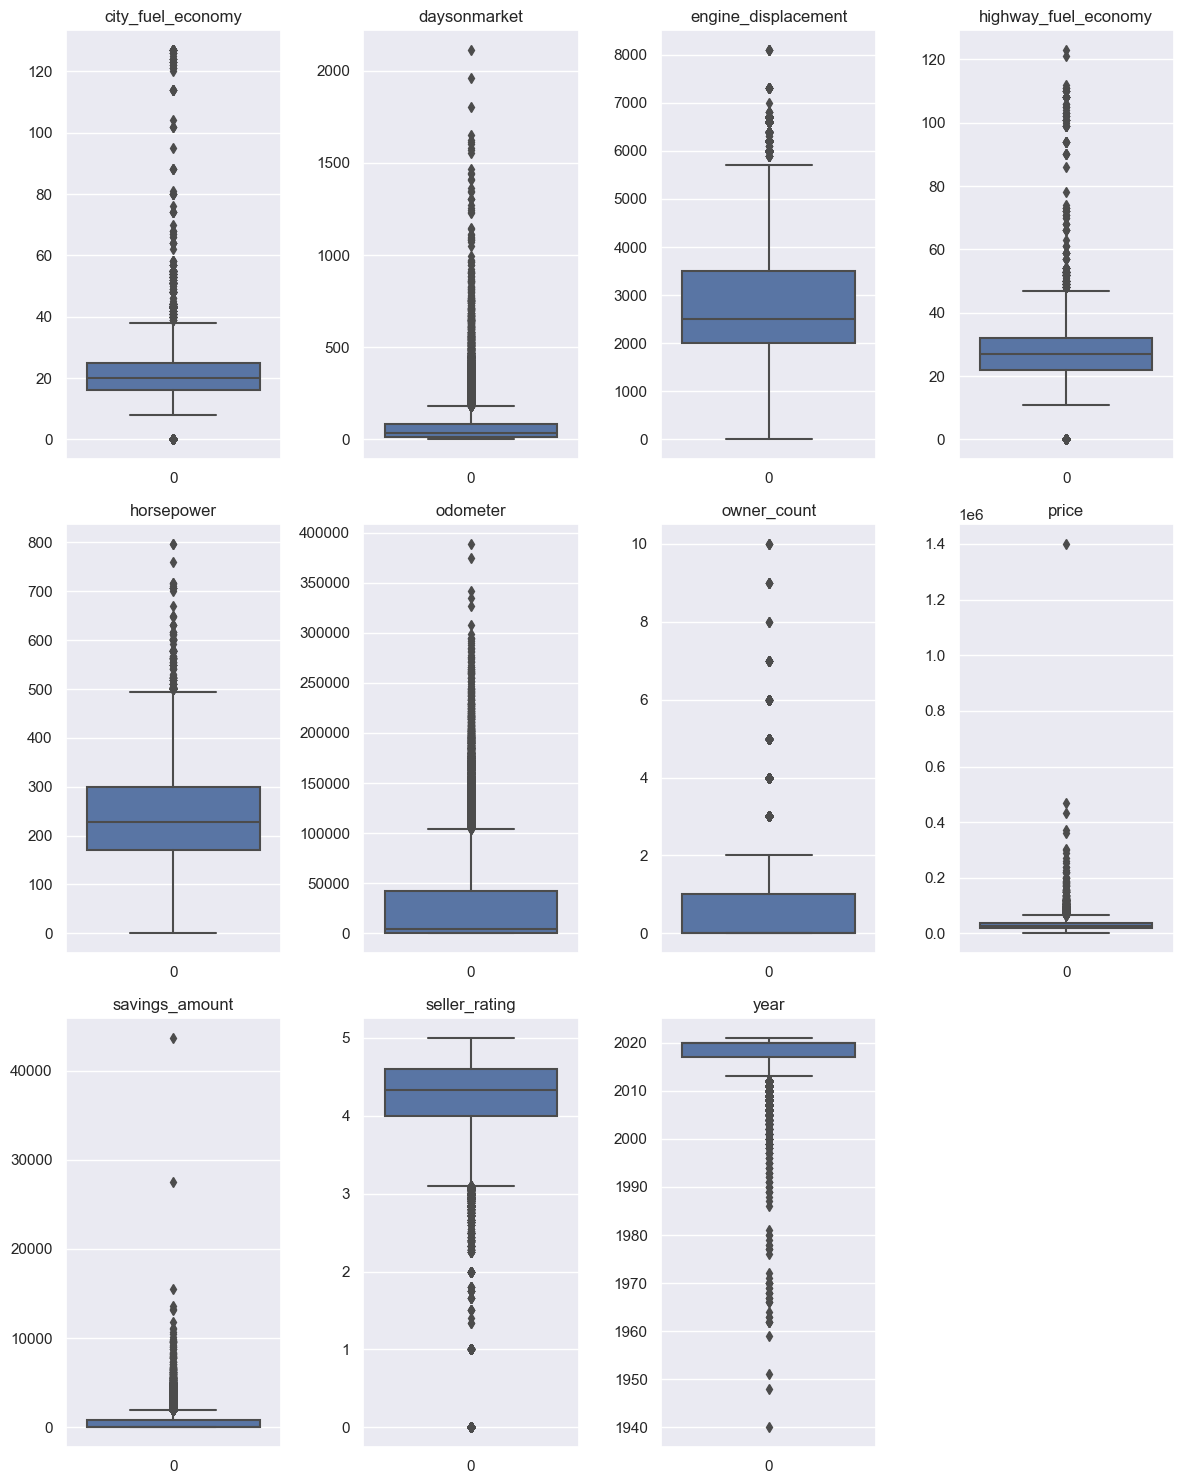

Box Plots (normalized)

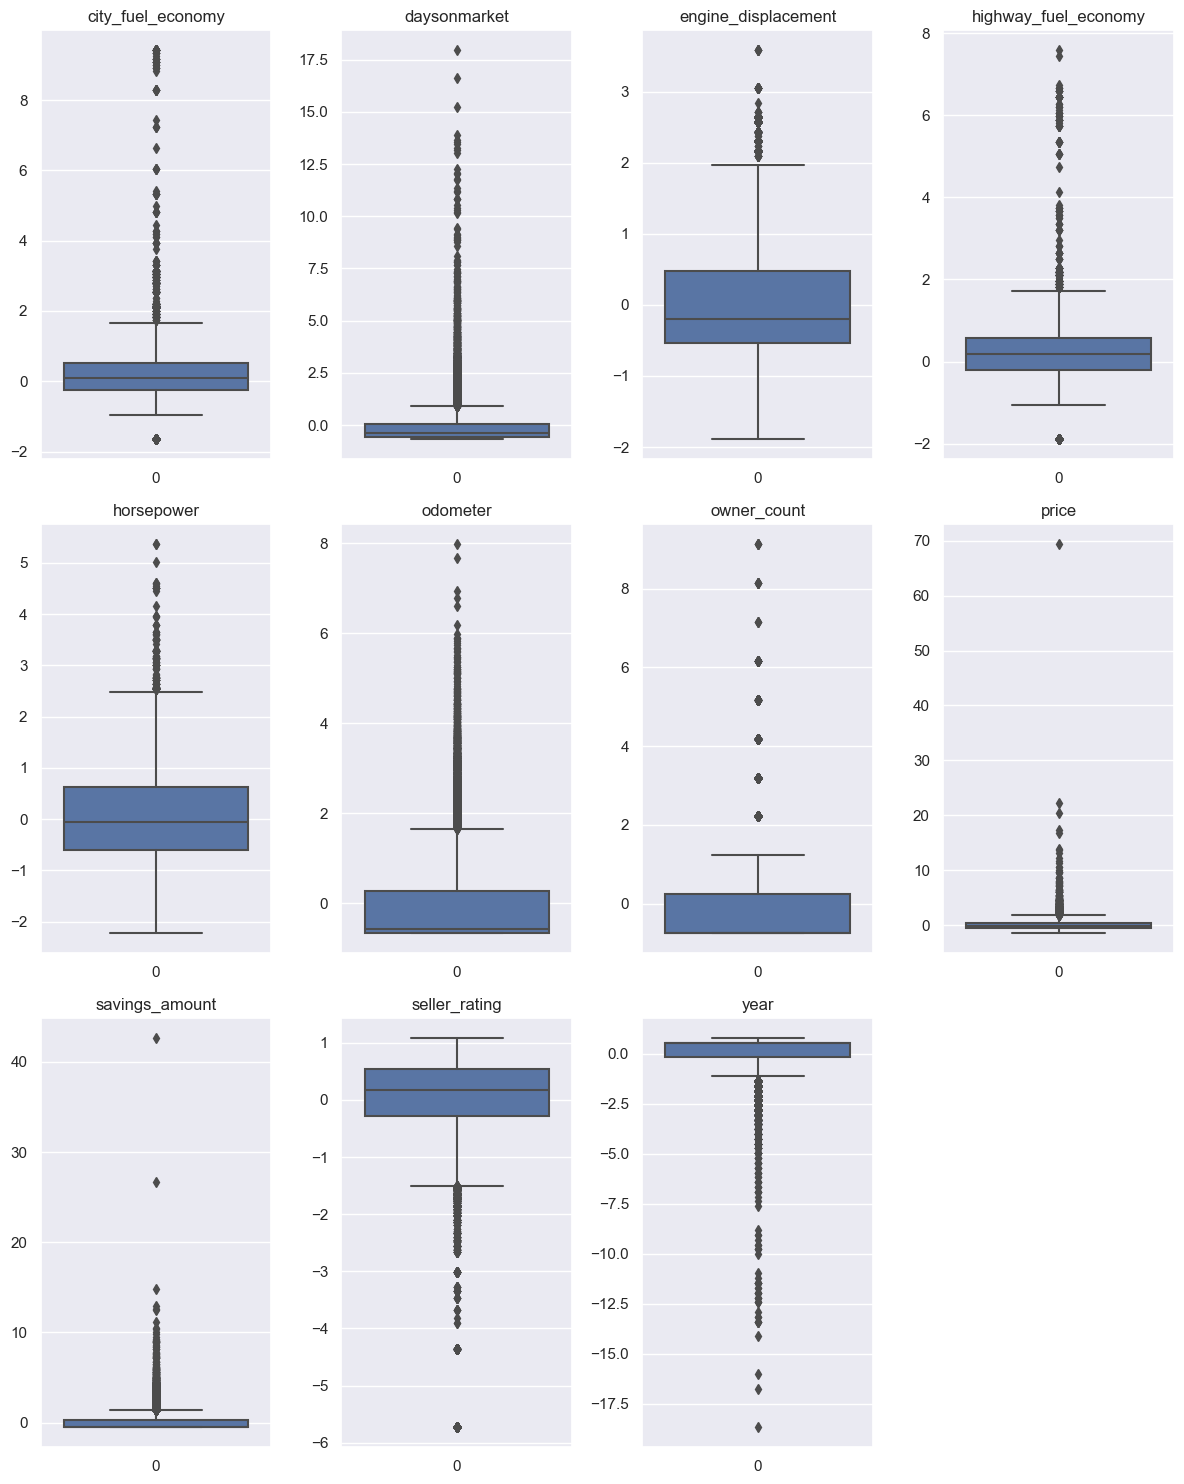

Histograms

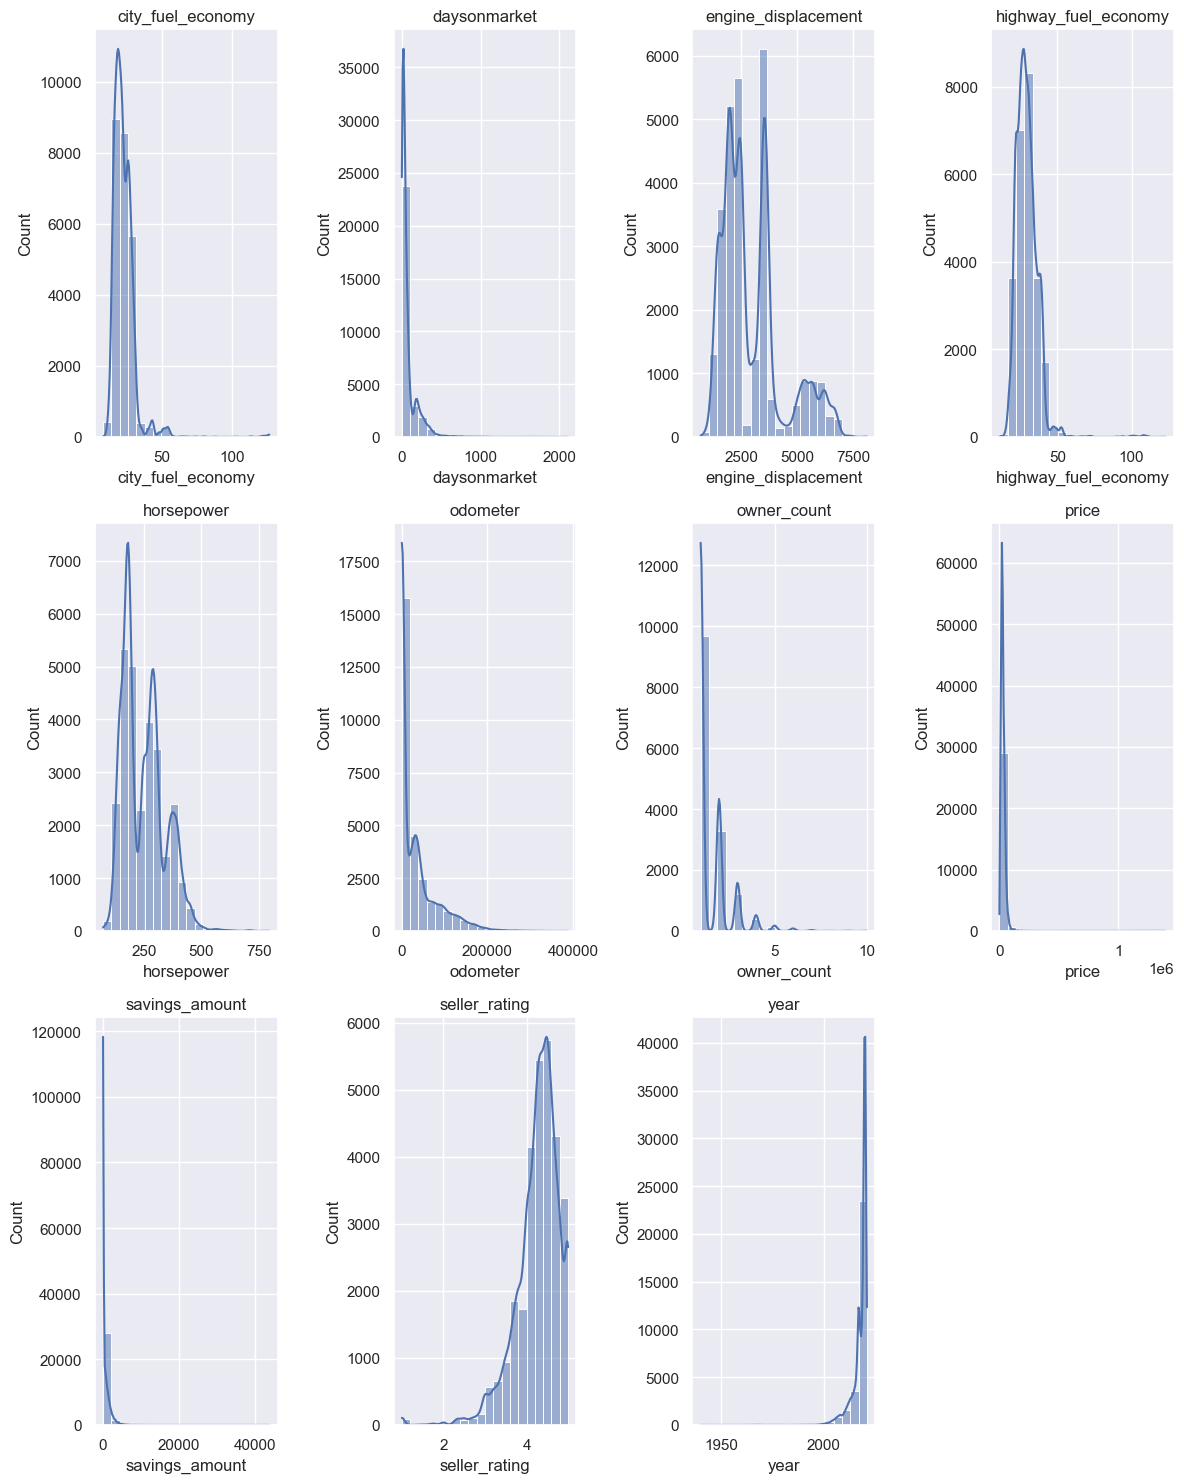

Bar Charts

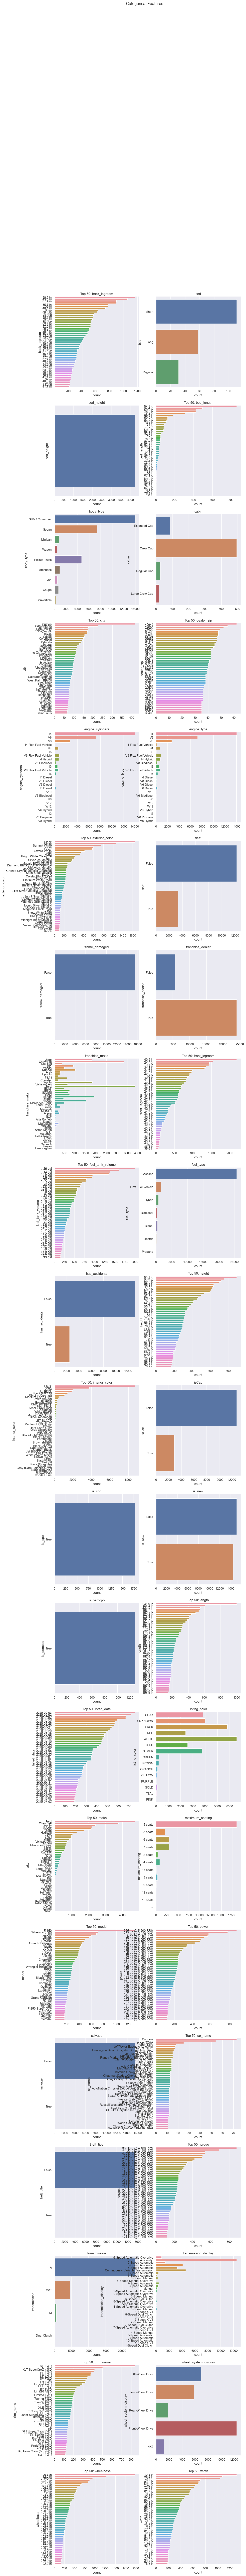

Pair Plots

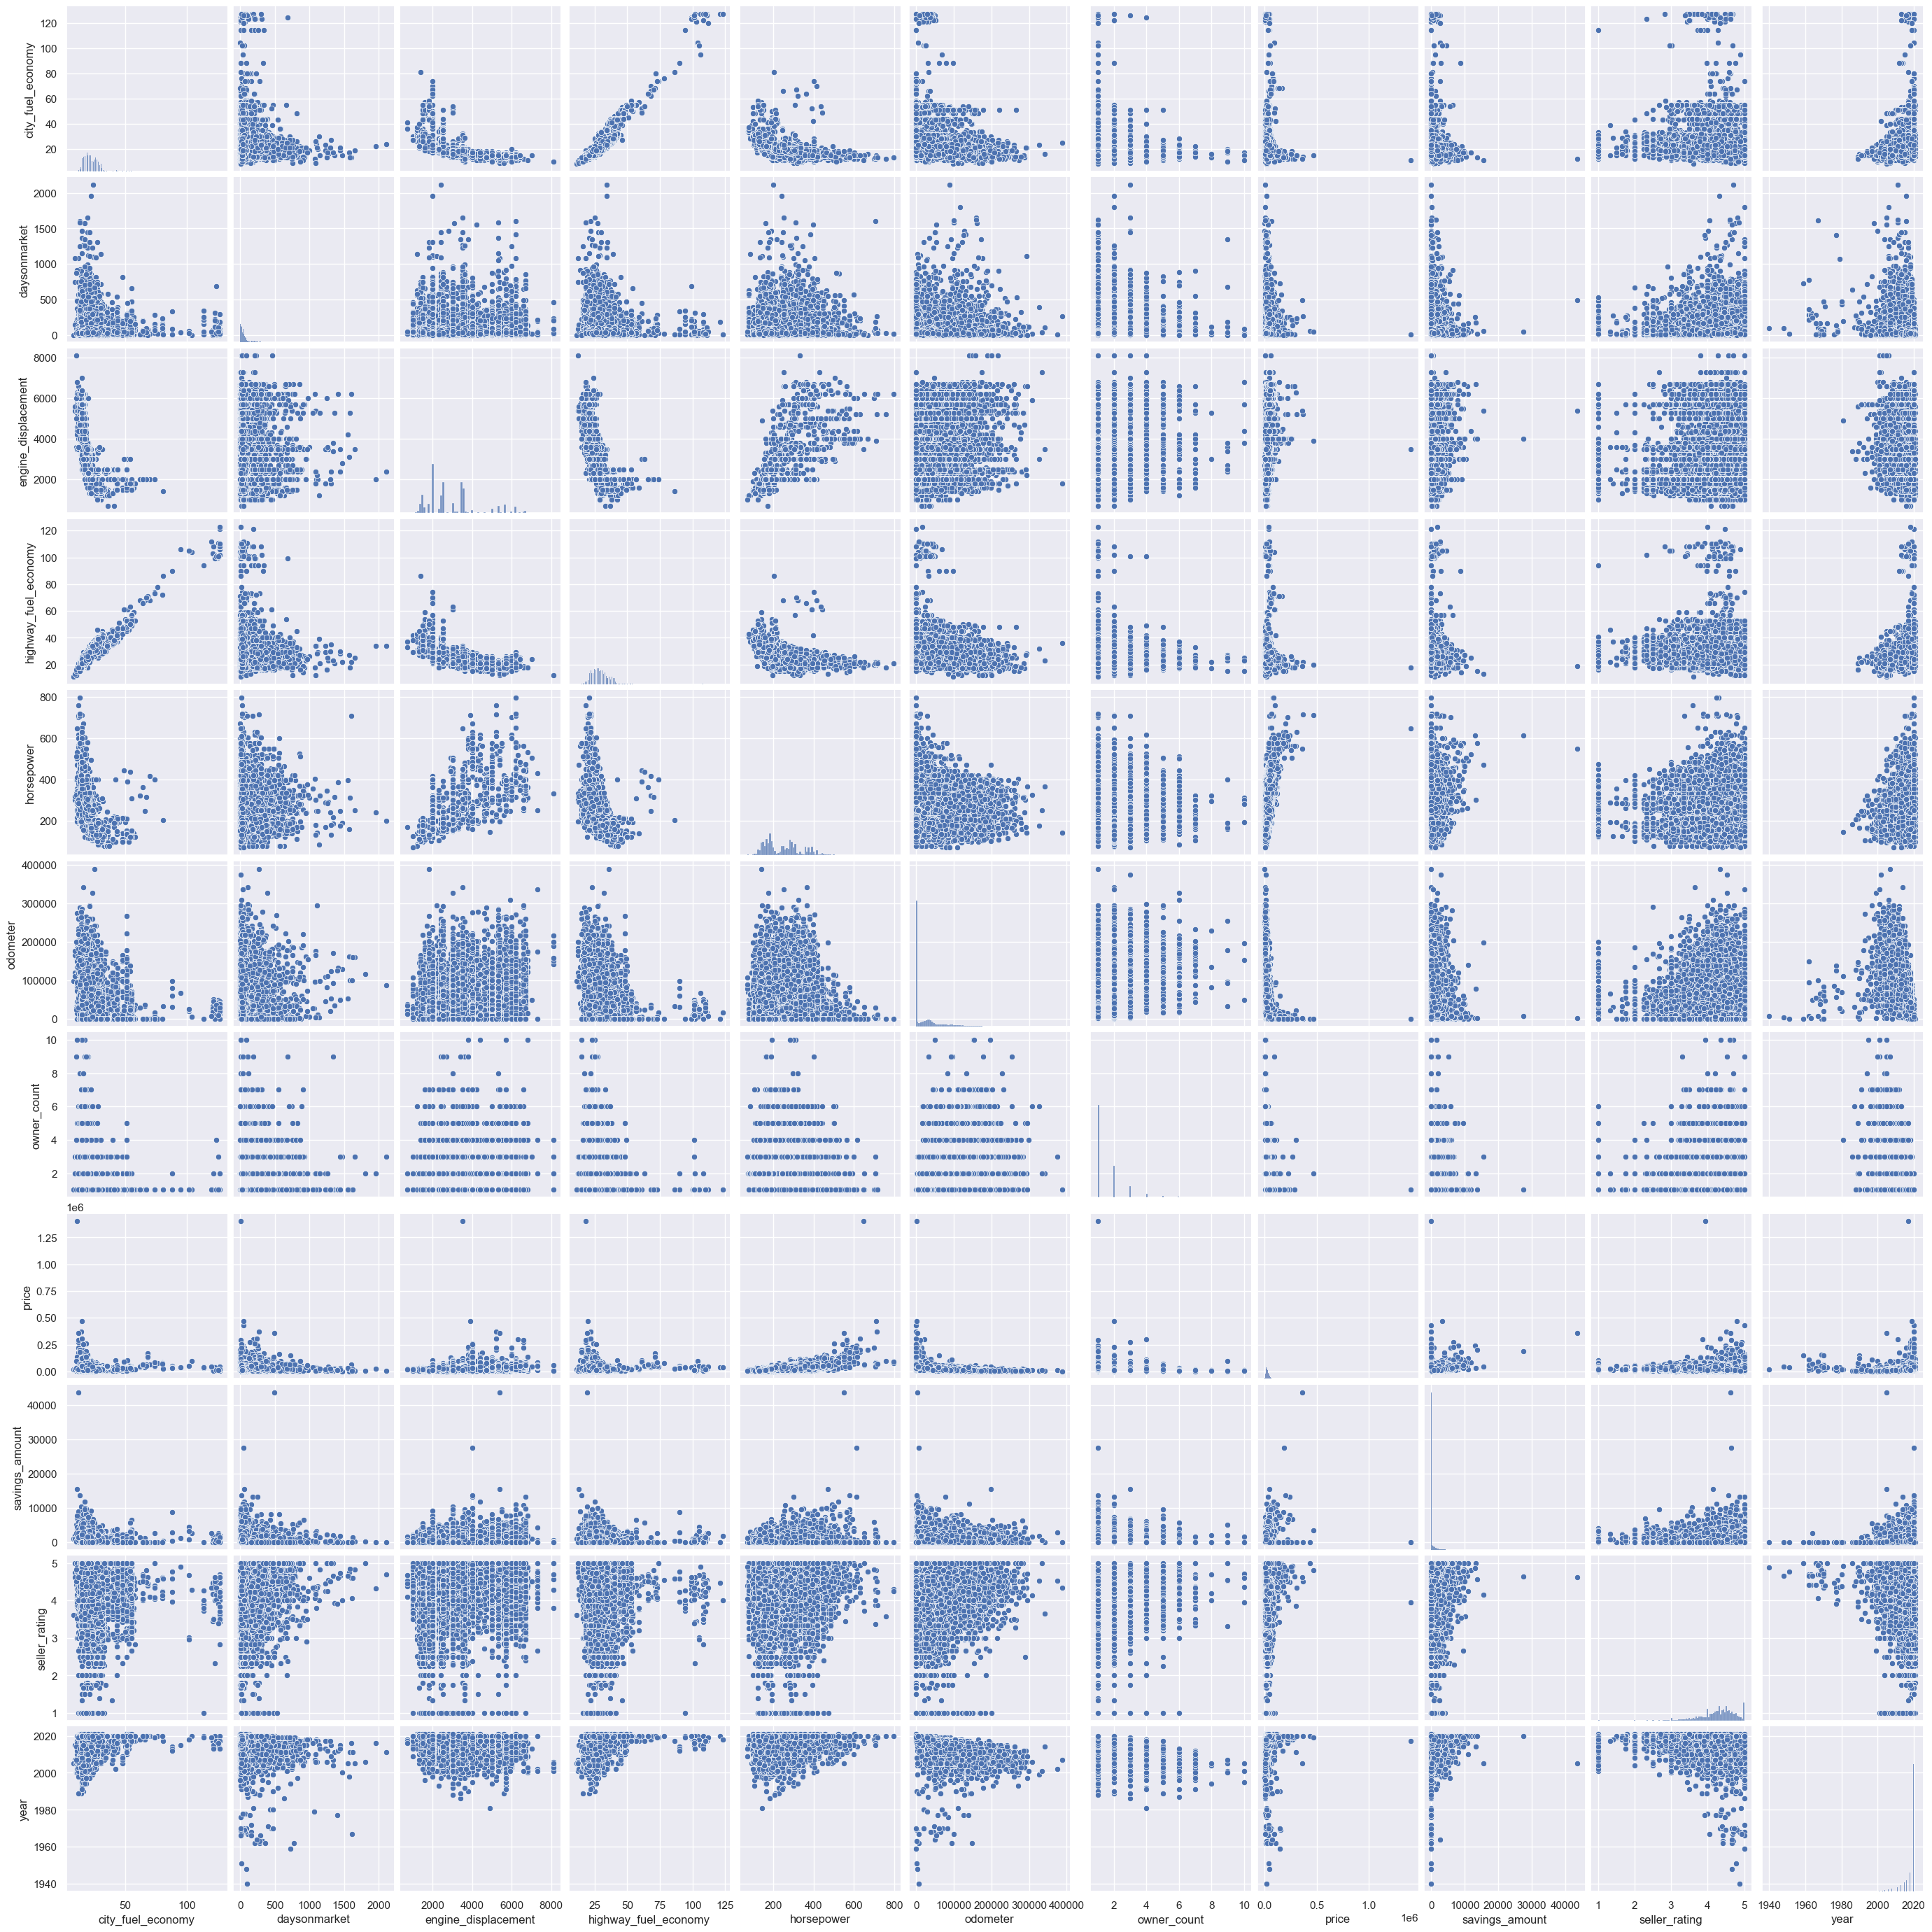

Boolean Columns

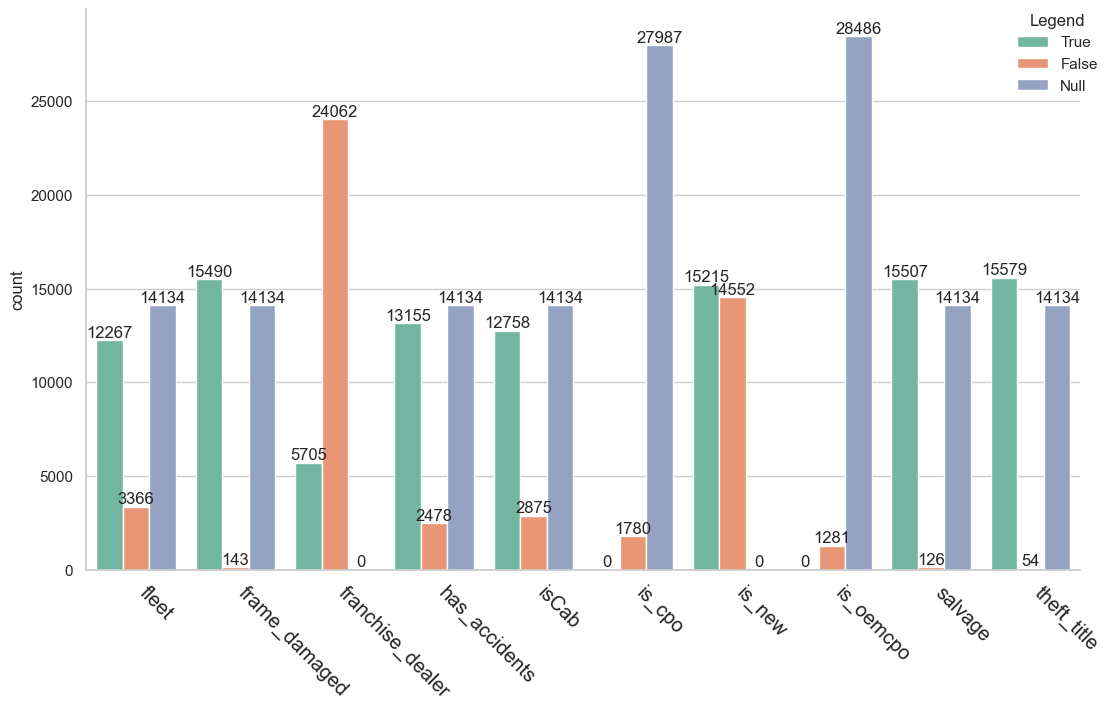

In [22]:
visualize_data(dataset_title, df)

In [23]:
show_heading("Investigate Specific Columns")

def investigate_col(df, col):
    describe_data("For column " + col, df[[col]], verbose=True)

# Disabled, very verbose    
#for col in df.columns:
#    investigate_col(df, col)
   

None

Investigate Specific Columns

In [24]:
#investigate_col(df, 'sp_name')
# definitely drop sp_name

#investigate_col(df, 'bed')
# bed would be useful, but very few samples, drop it
# may be enough to use for full dataset without sampling

# drop dealer_zip, keep city instead
#investigate_col(df, 'city')

#investigate_col(df, 'cabin')
# cabin is useful for trucks, but lots of nulls, probably for non-trucks

#investigate_col(df, 'bed_height')
# in the sample, the only non-null value of bed-height is '--', drop it.


# bed_length is stored as a string with units in it instead of just numerically
# drop it, not worth the trouble probably, 

# body_type looks useful.

# engine_displacement looks relatively clean, can impute with mean

# engine_type and engine_cylinders are overlapping, and string values, seem problematic.

# wheelbase and width and height and bed_length are entered as strings rather than numeric

# front_legroom and back_legroom 


# city_fuel_economy looks like clean numeric column

# fuel_tank_volume is a string with (mostly) units of gallons in it.

# horsepower is numeric 
# power is string-based, drop it and keep horsepower

# is_cpo only shows as one value


# savings_amount is numeric, and think is something about MSRP or something
# scared it will skew regularization output with data it should not know; drop it.


### Outliers

The above box plots for the numeric features without any rescaling show that there are some outliers that we need to cleanup.


In [25]:
# Cap outliers in numeric columns based on number of standard deviations.
def cap_outliers(df, z_mult):
    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            lower_limit = df[colname].mean() - z_mult * df[colname].std()
            upper_limit = df[colname].mean() + z_mult * df[colname].std()
            print(f"Capping column: {colname} lower={lower_limit} upper={upper_limit}")
            
            df[colname] = np.where(
                df[colname] > upper_limit, upper_limit,
                np.where(
                    df[colname] < lower_limit, lower_limit,
                    df[colname]
                )
            )

    return df

In [26]:
def clean_numeric_columns(df):
    numeric_cols = [cn for cn in df.columns if is_numeric_dtype(df[cn]) and not col_is_bool(df,cn)]
    numeric_cols = set(numeric_cols)
    numeric_cols.remove('price')  # do not change price

    #print("Numeric_cols:", numeric_cols)

    for col in numeric_cols:
        print("Cleaning numeric column:", col)
        df[col] = df[col].fillna(df[col].mean())
    
    return df

In [27]:
def clean_cat_columns(df):
    cat_cols = [cn for cn in df.columns if not is_numeric_dtype(df[cn]) and not col_is_bool(df,cn)]
    #print("cat_cols:", cat_cols)

    df = df.copy()
    for col in cat_cols:
        mv = df[col].mode()[0]
        nc = df[col].isnull().sum()
        print(f"Replacing {nc} null values in column '{col}' with mode='{mv}'")
        df[col] = df[col].fillna(mv)
    return df

#_ = clean_cat_columns(df)


In [28]:
show_heading("Data Cleaning")

df_cleaned = df.copy()

# Do some adjustments on particular columns based on meaning of columns.

# Drops rows without price information.
df_cleaned  = df_cleaned.dropna(subset=['price'])

# No zero or negative prices.
MIN_PRICE = 1
# Keep the max price to a reasonable value.
MAX_PRICE = 300000

df_cleaned = df_cleaned.drop(df[df['price'] < MIN_PRICE].index)
df_cleaned = df_cleaned.drop(df[df['price'] > MAX_PRICE].index)

# No years in the future.
MAX_YEAR = 2023
df_cleaned['year'] = np.where(df_cleaned['year'] > MAX_YEAR, MAX_YEAR, df_cleaned['year'])

# No huge odometer values.
MAX_MILES = 300000
df_cleaned['odometer'] = np.where(df_cleaned['odometer'] > MAX_MILES, MAX_MILES, df_cleaned['odometer'])


# Drop additional columns based on investigation.
more_drop_cols = ['bed', 'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_type',
                  'franchise_dealer', 'franchise_make', 'listed_date', 'power',
                  'savings_amount', 'seller_rating', 'sp_name', 'torque',
                  'transmission_display', 'trim_name',
                 'is_cpo', 'is_oemcpo']


df_cleaned = df_cleaned.drop(columns=more_drop_cols)

# TODO: try to clean these measurement columns so we can use them.

# And drop the columns which contain numeric values as strings with number and unit.
string_unit_cols = ['back_legroom', 'bed_height', 'bed_length', 'front_legroom', 'fuel_tank_volume',
                    'height', 'length', 'maximum_seating', 'wheelbase', 'width']

df_cleaned = df_cleaned.drop(columns=string_unit_cols)



# cap outliers beyond 3 std devs.
df_cleaned = cap_outliers(df_cleaned, z_mult=3)

# Impute value for missing numeric fields as mean
#df_cleaned['year'] = df_cleaned['year'].fillna(df_cleaned['year'].mean())
#df_cleaned['odometer'] = df_cleaned['odometer'].fillna(df_cleaned['odometer'].mean())

df_cleaned = clean_numeric_columns(df_cleaned)
    

# Replace categorical missing values with the mode of the column
df_cleaned = clean_cat_columns(df_cleaned)


# Cleanup boolean columns, also imputs missing values as mode of column
# before generic cleanup and imputation, set default values or na of columns where we have intrinsic/semantic
# knowledge of the meaning.
default_false_cols = ['fleet', 'frame_damaged', 'salvage', 'theft_title']
df_cleaned[default_false_cols] = df_cleaned[default_false_cols].fillna(False)
df_cleaned = clean_bool_columns(df_cleaned)

display(df_cleaned.describe())

Data Cleaning

Capping column: city_fuel_economy lower=-2.8436368580712923 upper=48.20159392094639
Capping column: engine_displacement lower=-1076.2709604967035 upper=7009.5353938537955
Capping column: highway_fuel_economy lower=6.727791448954658 upper=52.19265806165879
Capping column: horsepower lower=-23.058416904253733 upper=518.3629072820157
Capping column: is_new lower=-1.0107916730778763 upper=1.9885141958425683
Capping column: odometer lower=-105122.74079422517 upper=168051.3792819057
Capping column: owner_count lower=-1.2483831003449881 upper=4.327243182928079
Capping column: price lower=-22647.9873952026 upper=82045.14865860101
Capping column: year lower=2005.212135294476 upper=2030.1819710863579
Cleaning numeric column: year
Cleaning numeric column: horsepower
Cleaning numeric column: city_fuel_economy
Cleaning numeric column: owner_count
Cleaning numeric column: engine_displacement
Cleaning numeric column: highway_fuel_economy
Cleaning numeric column: odometer
Replacing 118 null values in 

['fleet',
 'frame_damaged',
 'has_accidents',
 'isCab',
 'is_new',
 'salvage',
 'theft_title']

city_fuel_economy  engine_displacement  highway_fuel_economy  \
count       29761.000000         29761.000000          29761.000000   
mean           22.386290          2966.160960             29.281782   
std             5.847614          1307.063933              5.848426   
min             8.000000           700.000000             11.000000   
25%            19.000000          2000.000000             25.000000   
50%            22.386290          2500.000000             29.281782   
75%            25.000000          3500.000000             32.000000   
max            48.201594          7009.535394             52.192658   

         horsepower       odometer   owner_count         price          year  
count  29761.000000   29761.000000  29761.000000  29761.000000  29761.000000  
mean     247.405525   30869.865663      1.517853  29384.861572   2017.799196  
std       86.725897   42166.824412      0.587468  15729.496876      3.523065  
min       70.000000       0.000000      1.000000    484.000000   2005.212135  
25%      175.000000       7.000000      1.000000  18219.000000   2017.000000  
50%      247.405525   14345.000000      1.517853  26390.000000   2020.000000  
75%      300.000000   41785.000000      1.517853  38000.000000   2020.000000  
max      518.362907  168051.379282      4.327243  82045.148659   2021.000000

In [29]:
# NOTE: Set verbose=true to see description of each column in more detail.

describe_data("Cleaned " + dataset_title, df_cleaned, verbose=False)

Dataset Name: Cleaned Cargurus

Info

Shape: (29761, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29761 entries, 0 to 29766
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             29761 non-null  object 
 1   cabin                 29761 non-null  object 
 2   city                  29761 non-null  object 
 3   city_fuel_economy     29761 non-null  float64
 4   engine_displacement   29761 non-null  float64
 5   exterior_color        29761 non-null  object 
 6   fleet                 29761 non-null  bool   
 7   frame_damaged         29761 non-null  bool   
 8   fuel_type             29761 non-null  object 
 9   has_accidents         29761 non-null  bool   
 10  highway_fuel_economy  29761 non-null  float64
 11  horsepower            29761 non-null  float64
 12  interior_color        29761 non-null  object 
 13  isCab                 29761 non-null  bool   
 14  is_new                29761 non-null  bool   
 15  

None

Sample

body_type     cabin          city  city_fuel_economy  \
0  SUV / Crossover  Crew Cab       Bayamon           22.38629   
1  SUV / Crossover  Crew Cab        Linden           22.38629   
2  SUV / Crossover  Crew Cab     Bay Shore           17.00000   
3            Sedan  Crew Cab     Bay Shore           12.00000   
4            Sedan  Crew Cab  Little Ferry           22.38629   

   engine_displacement         exterior_color  fleet  frame_damaged  \
0               2500.0                   GRIS  False          False   
1               4700.0                   None  False          False   
2               3600.0      Graphite Metallic  False          False   
3               6200.0  Black Diamond Tricoat  False          False   
4               2000.0                    Red   True          False   

           fuel_type  has_accidents  highway_fuel_economy  horsepower  \
0           Gasoline          False             29.281782  187.000000   
1           Gasoline          False             29.281782  235.000000   
2           Gasoline          False             25.000000  310.000000   
3           Gasoline          False             18.000000  518.362907   
4  Flex Fuel Vehicle           True             29.281782  160.000000   

  interior_color  isCab  is_new listing_color       make  odometer  \
0          Black  False    True          GRAY      Mazda       5.0   
1           None  False   False       UNKNOWN       Jeep  166069.0   
2      Jet Black  False   False       UNKNOWN  Chevrolet   31895.0   
3  Black (Ebony)  False   False         BLACK   Cadillac   25813.0   
4          Black   True   False           RED       Ford   88763.0   

            model  owner_count    price  salvage  theft_title transmission  \
0            CX-5     1.517853  35695.0    False        False            A   
1  Grand Cherokee     3.000000   2499.0    False        False            A   
2        Traverse     1.000000  28572.0    False        False            A   
3           CTS-V     2.000000  45949.0    False        False            A   
4           Focus     2.000000   6750.0    False        False            A   

  wheel_system_display         year  
0      All-Wheel Drive  2019.000000  
1     Four-Wheel Drive  2005.212135  
2     Four-Wheel Drive  2018.000000  
3     Rear-Wheel Drive  2013.000000  
4    Front-Wheel Drive  2015.000000

Types

body_type                object
cabin                    object
city                     object
city_fuel_economy       float64
engine_displacement     float64
exterior_color           object
fleet                      bool
frame_damaged              bool
fuel_type                object
has_accidents              bool
highway_fuel_economy    float64
horsepower              float64
interior_color           object
isCab                      bool
is_new                     bool
listing_color            object
make                     object
odometer                float64
model                    object
owner_count             float64
price                   float64
salvage                    bool
theft_title                bool
transmission             object
wheel_system_display     object
year                    float64
dtype: object

Null Proportion

body_type               0.0
cabin                   0.0
city                    0.0
city_fuel_economy       0.0
engine_displacement     0.0
exterior_color          0.0
fleet                   0.0
frame_damaged           0.0
fuel_type               0.0
has_accidents           0.0
highway_fuel_economy    0.0
horsepower              0.0
interior_color          0.0
isCab                   0.0
is_new                  0.0
listing_color           0.0
make                    0.0
odometer                0.0
model                   0.0
owner_count             0.0
price                   0.0
salvage                 0.0
theft_title             0.0
transmission            0.0
wheel_system_display    0.0
year                    0.0
dtype: float64

Null Counts


body_type               0
transmission            0
theft_title             0
salvage                 0
price                   0
owner_count             0
model                   0
odometer                0
make                    0
listing_color           0
is_new                  0
isCab                   0
interior_color          0
horsepower              0
highway_fuel_economy    0
has_accidents           0
fuel_type               0
frame_damaged           0
fleet                   0
exterior_color          0
engine_displacement     0
city_fuel_economy       0
city                    0
cabin                   0
wheel_system_display    0
year                    0
dtype: int64

Box Plots

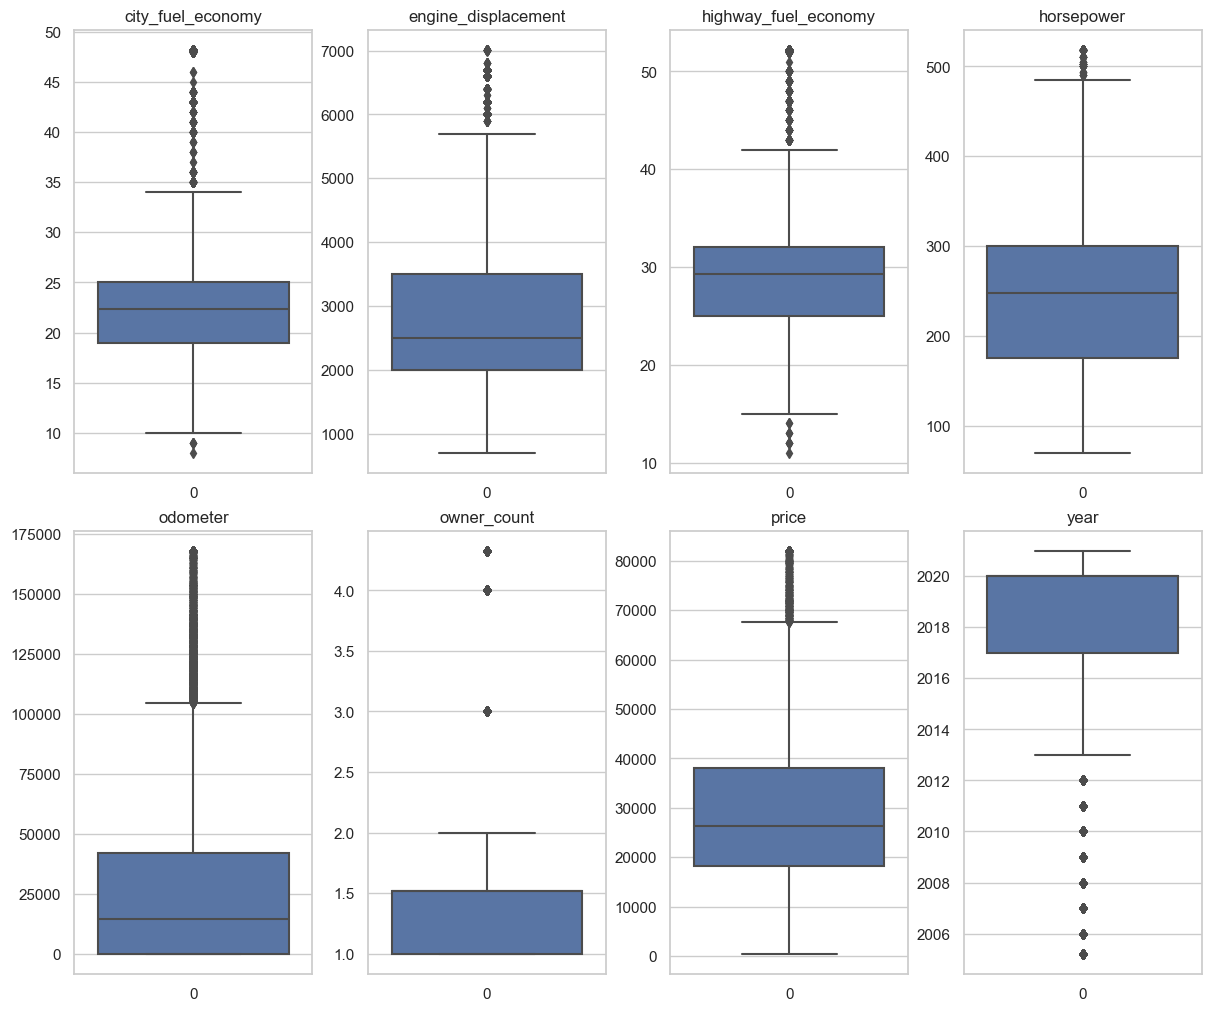

Box Plots (normalized)

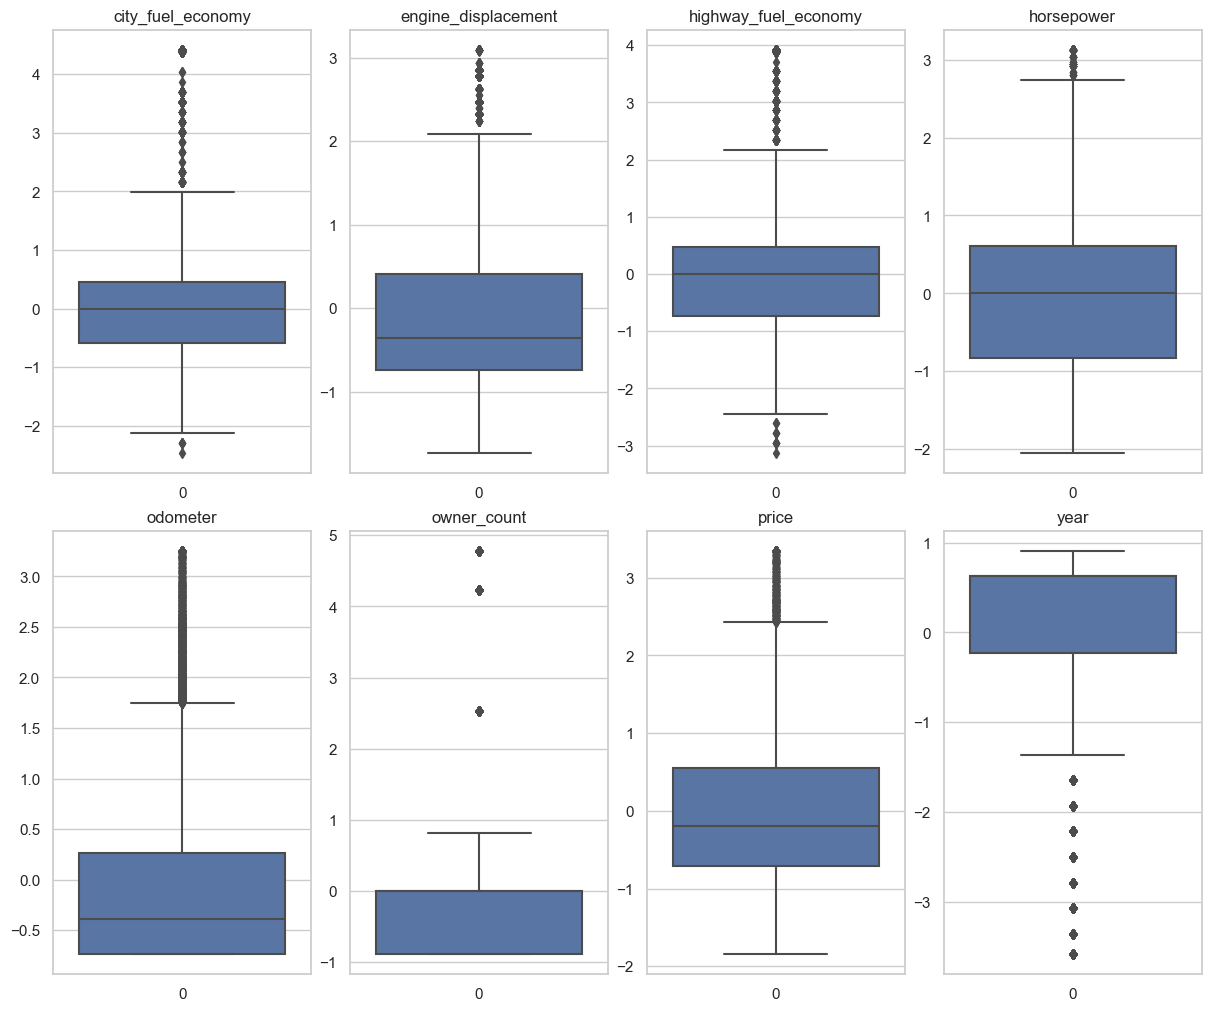

Histograms

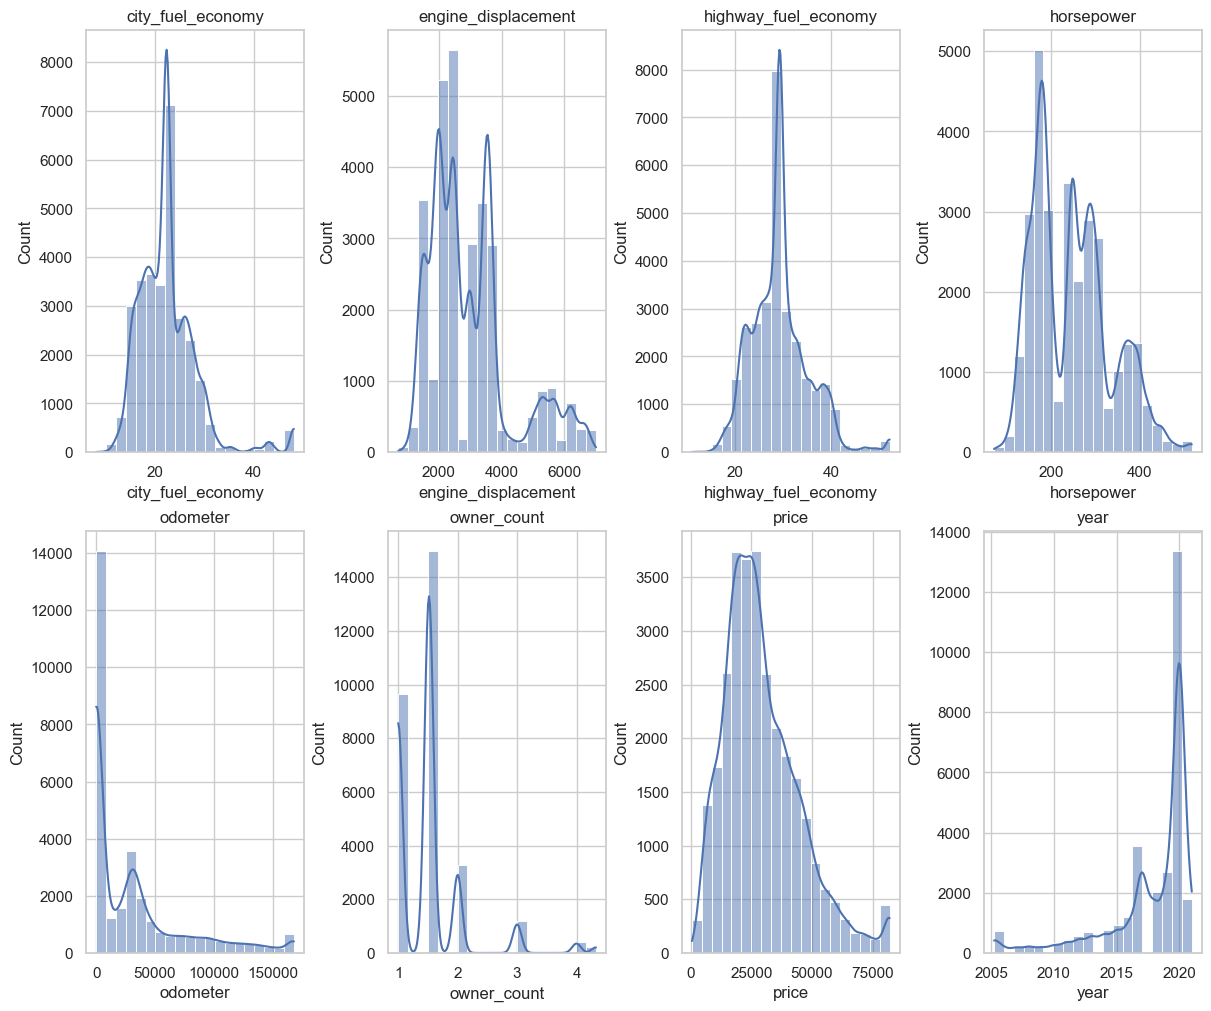

Bar Charts

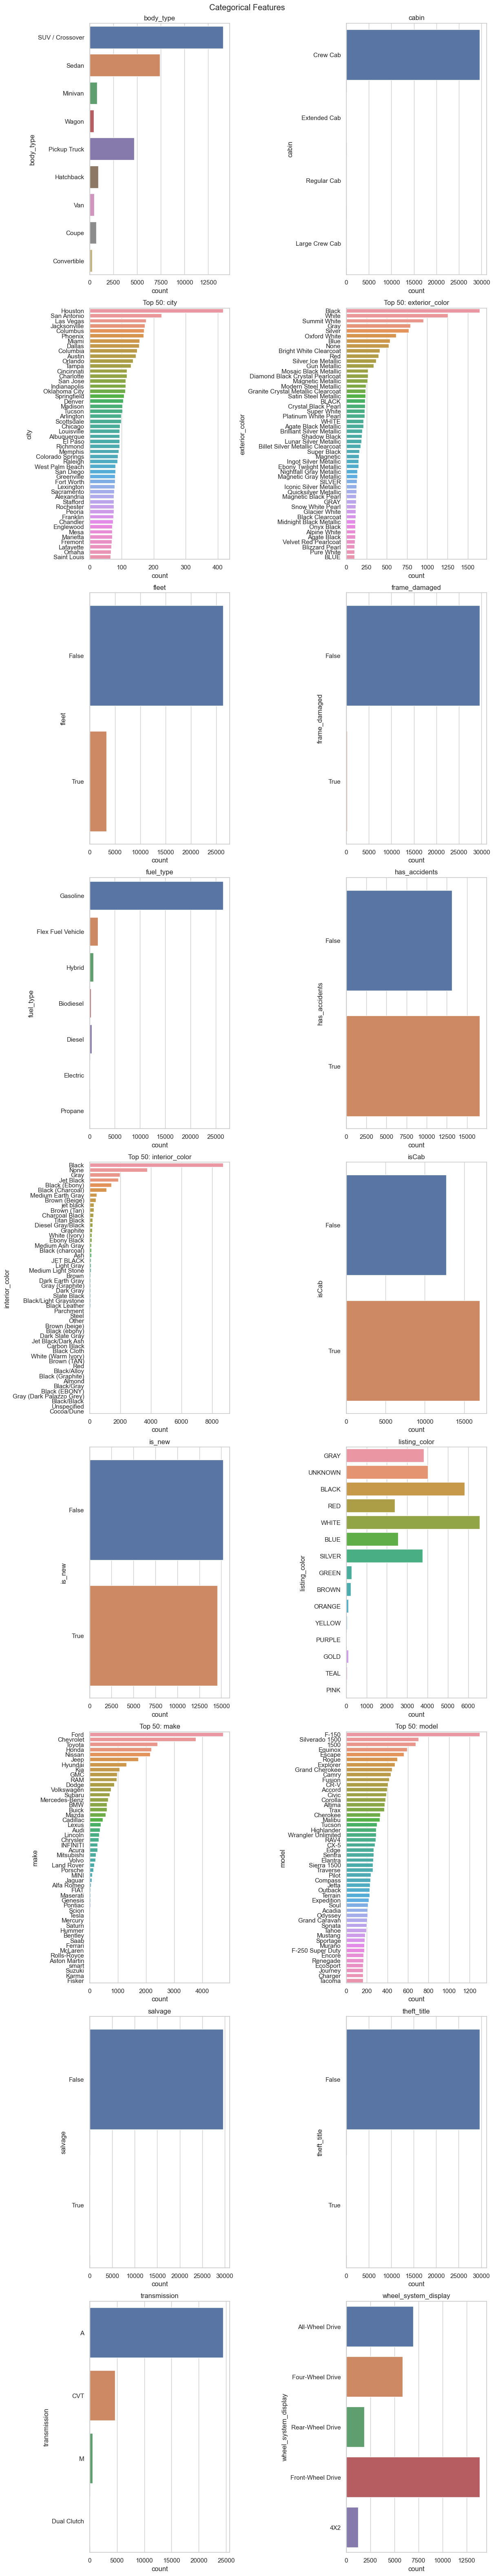

Pair Plots

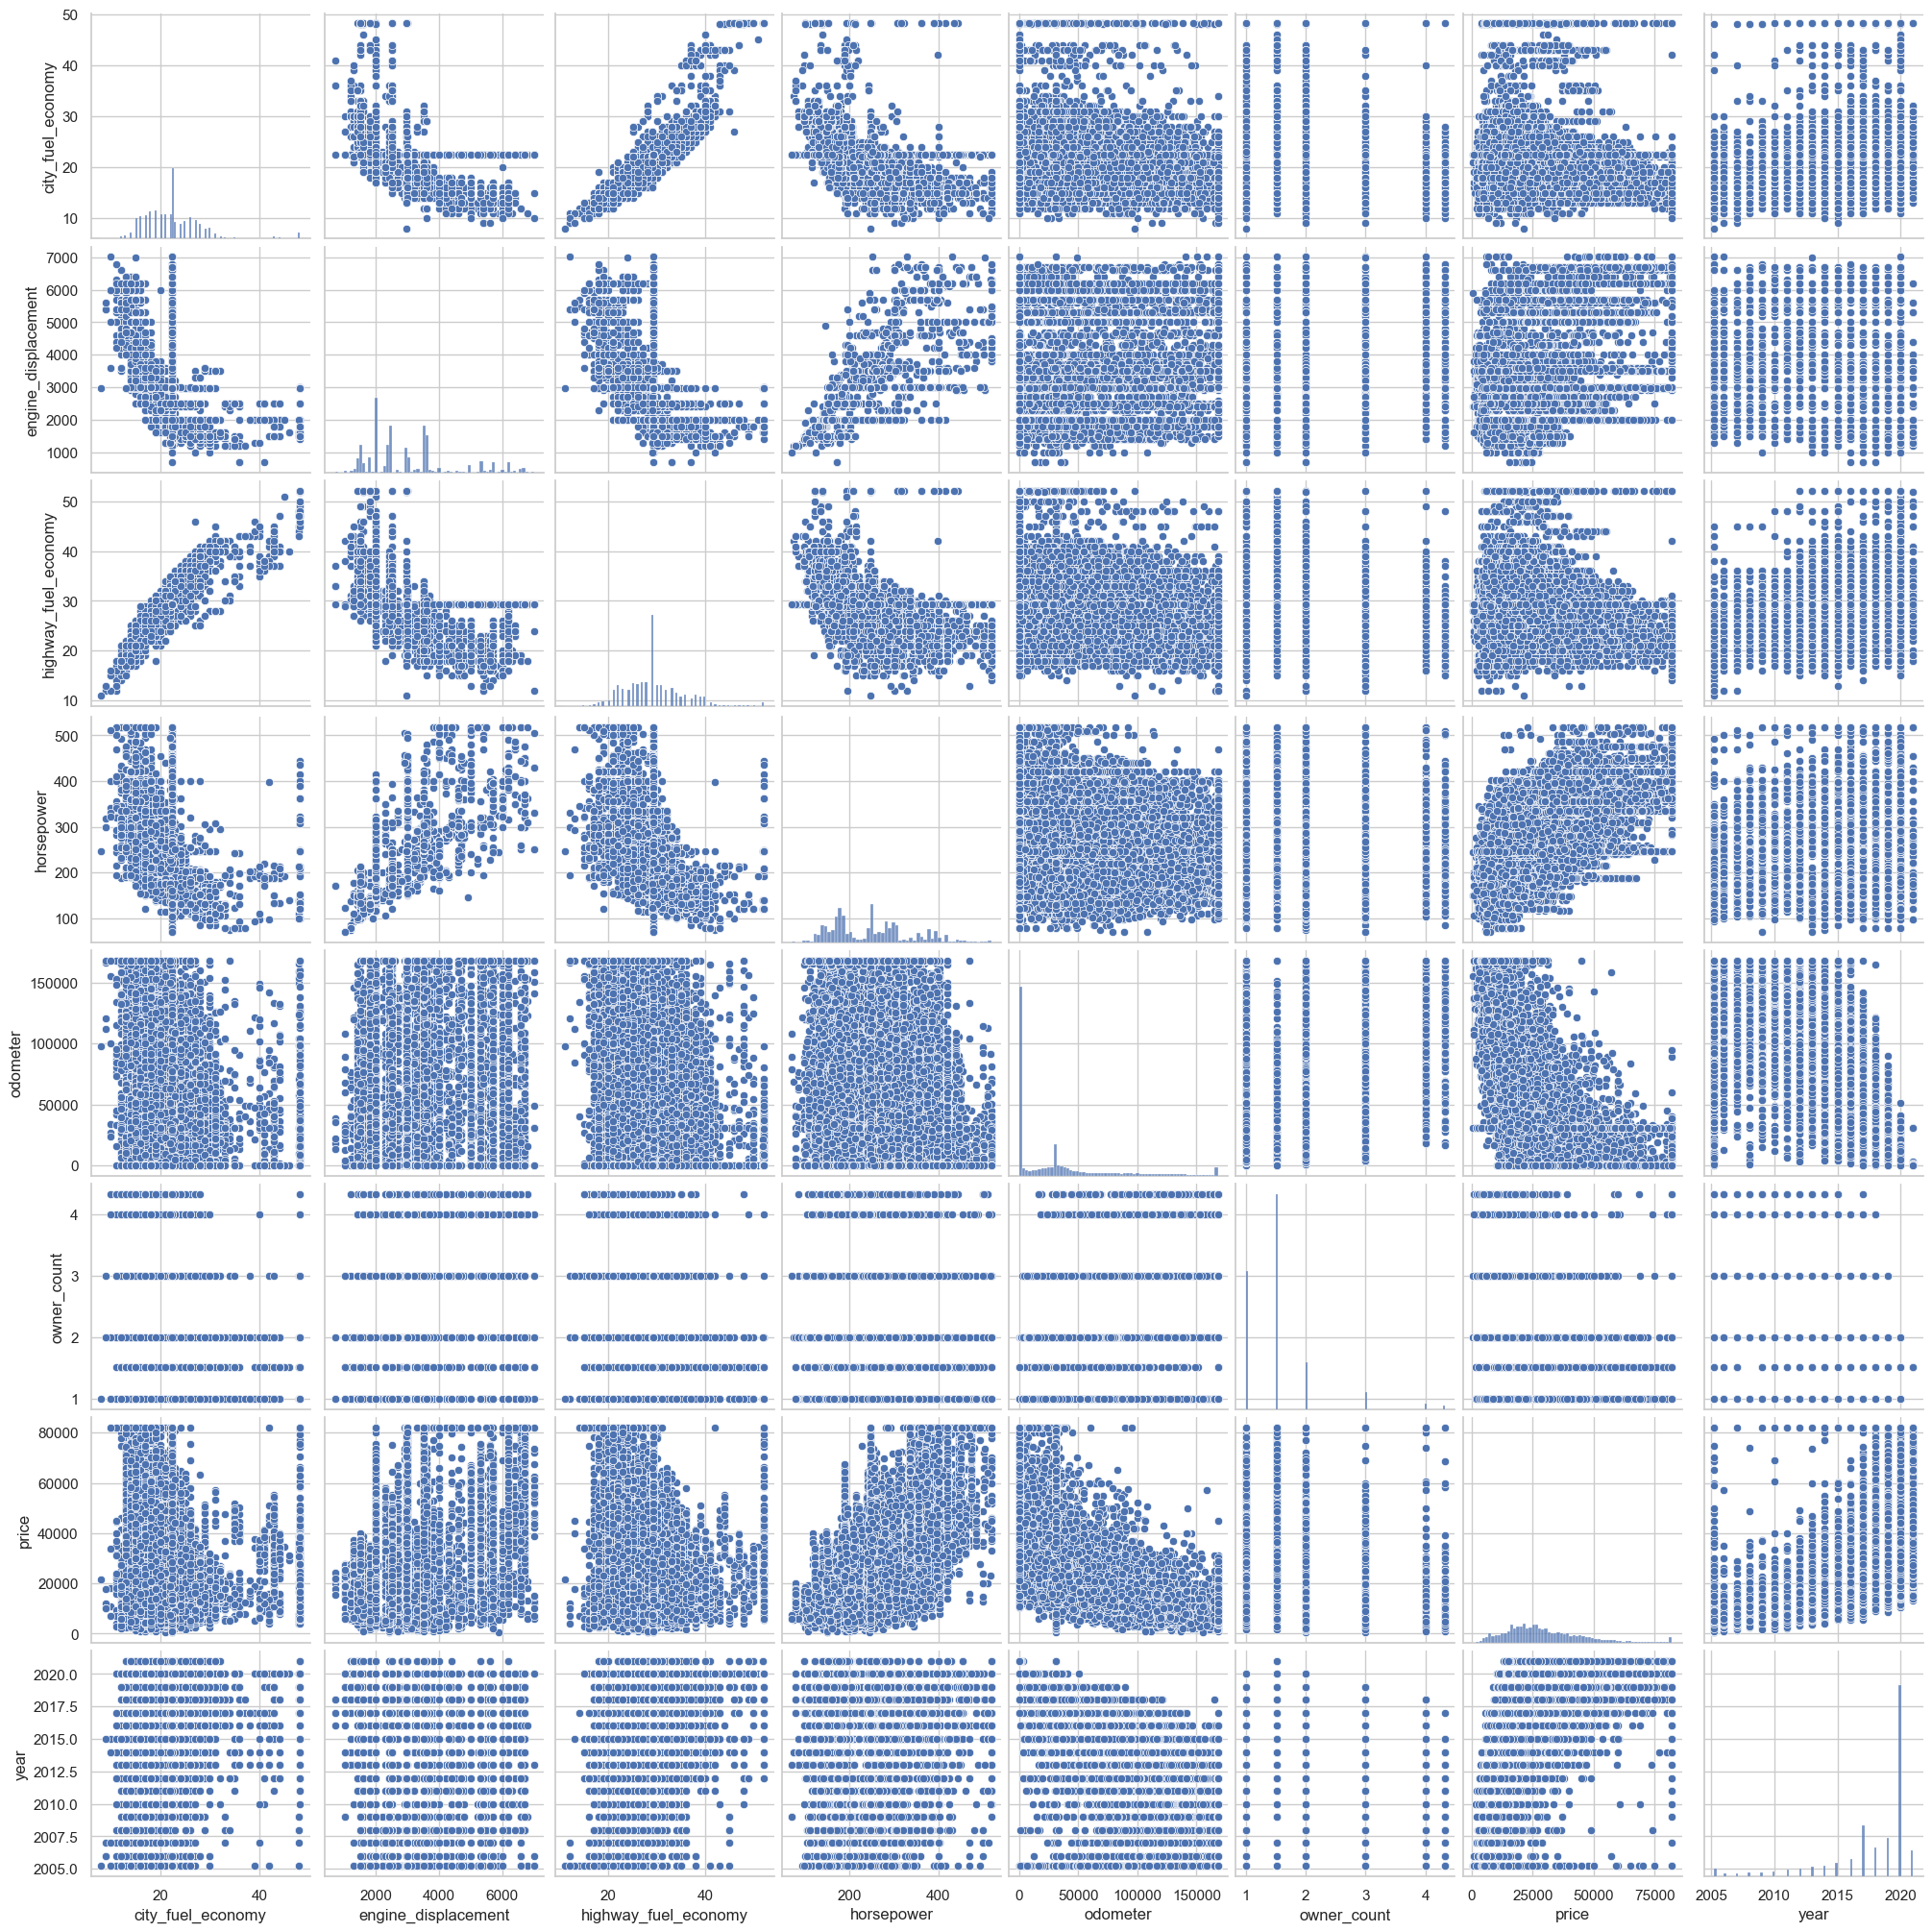

Boolean Columns

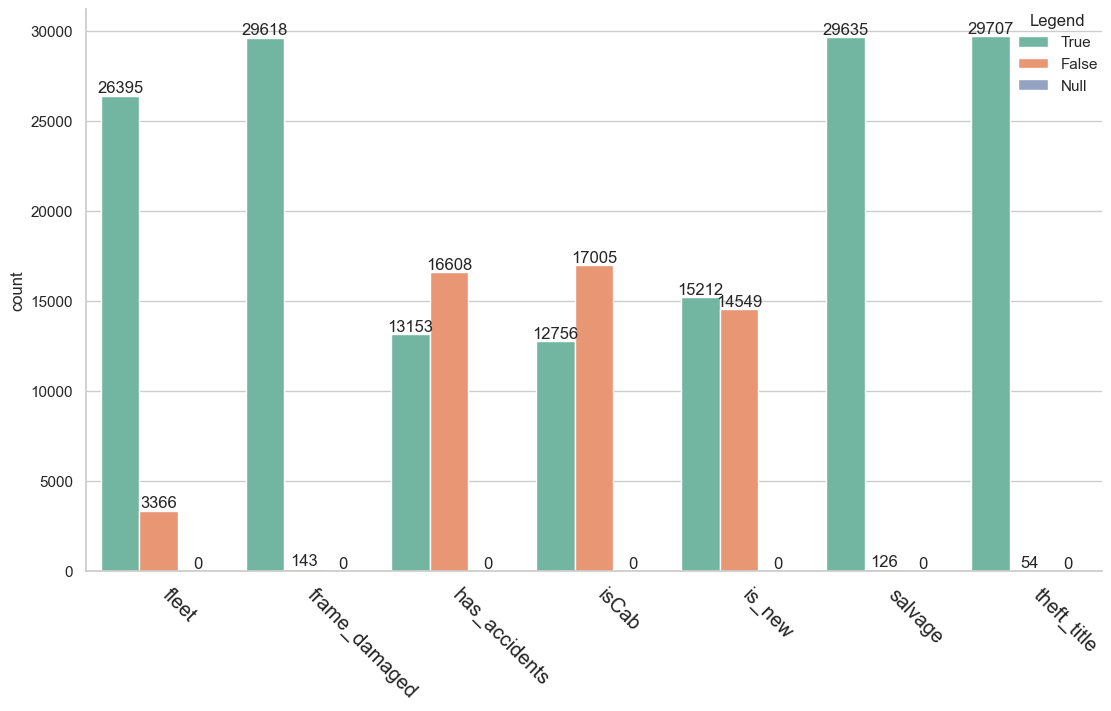

In [30]:
visualize_data("Cleaned " + dataset_title, df_cleaned)

Correlation Heatmap

body_type     cabin      city  city_fuel_economy  \
body_type              1.000000 -0.041196  0.007510           0.187848   
cabin                 -0.041196  1.000000 -0.000085          -0.035442   
city                   0.007510 -0.000085  1.000000           0.016691   
city_fuel_economy      0.187848 -0.035442  0.016691           1.000000   
engine_displacement   -0.271431  0.089825 -0.011621          -0.547985   
exterior_color        -0.004686  0.021264  0.003461           0.017610   
fleet                  0.038815  0.000142  0.012401          -0.018805   
frame_damaged          0.013968  0.008563  0.003722           0.007035   
fuel_type              0.086000 -0.060066  0.000302           0.158874   
has_accidents          0.004092 -0.023341 -0.013480           0.085048   
highway_fuel_economy   0.222303 -0.044201  0.020221           0.924018   
horsepower            -0.299079  0.043855 -0.014155          -0.606471   
interior_color         0.010725  0.013858 -0.014970          -0.037373   
isCab                  0.022052 -0.042701 -0.005766           0.107573   
is_new                -0.005145 -0.035462 -0.013299           0.117794   
listing_color         -0.002128  0.018917  0.004475          -0.004460   
make                   0.094724  0.005082  0.012900           0.201136   
odometer              -0.011418  0.081693  0.007490          -0.162518   
model                 -0.014726  0.007776 -0.002740          -0.076532   
owner_count           -0.071498  0.037212 -0.004486          -0.096899   
price                 -0.158229 -0.024273 -0.008468          -0.252947   
salvage                0.005403  0.014133 -0.005391          -0.000358   
theft_title           -0.000947 -0.002513  0.002096           0.004728   
transmission          -0.038890 -0.015855  0.002945           0.325168   
wheel_system_display  -0.003901 -0.037462 -0.003541           0.233604   
year                   0.068354 -0.089175 -0.006032           0.173872   

                      engine_displacement  exterior_color     fleet  \
body_type                       -0.271431       -0.004686  0.038815   
cabin                            0.089825        0.021264  0.000142   
city                            -0.011621        0.003461  0.012401   
city_fuel_economy               -0.547985        0.017610 -0.018805   
engine_displacement              1.000000       -0.006260 -0.001686   
exterior_color                  -0.006260        1.000000  0.010254   
fleet                           -0.001686        0.010254  1.000000   
frame_damaged                   -0.013456       -0.000204  0.071842   
fuel_type                       -0.338853       -0.010555 -0.001340   
has_accidents                   -0.050185       -0.005508 -0.282925   
highway_fuel_economy            -0.563022        0.009559  0.010820   
horsepower                       0.834846       -0.018008 -0.048604   
interior_color                   0.056982        0.123916 -0.009898   
isCab                           -0.069749       -0.000223  0.204029   
is_new                          -0.068248       -0.007118 -0.349024   
listing_color                    0.040439        0.423147 -0.002447   
make                            -0.088514       -0.089113  0.002492   
odometer                         0.144746        0.013334  0.190461   
model                            0.035023        0.051679  0.006691   
owner_count                      0.084014       -0.006912  0.062758   
price                            0.403864       -0.046448 -0.198902   
salvage                         -0.006166       -0.010669  0.015930   
theft_title                     -0.001818       -0.006451  0.019675   
transmission                    -0.201127       -0.034509 -0.027250   
wheel_system_display            -0.179070        0.031847  0.078536   
year                            -0.137112       -0.002910 -0.086478   

                      frame_damaged  fuel_type  has_accidents  \
body_type                  0.013968   0.

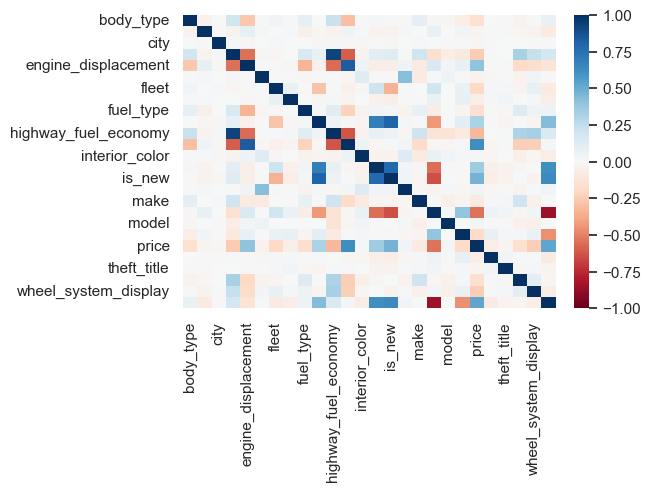

In [31]:
# Let's reexamine the correlation heatmap after cleaning up the outliers and missing values.
show_correlation(df_cleaned, show_heatmap=True)

In [32]:
show_heading("Correlation to Price")

def price_corr(df):   
    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            #print("norm:", colname)
            df[colname] = zscore(df[colname])
        else:
            #print("cat:", colname)
            df[colname] = df[colname].astype("category").cat.codes
    result = df.corr(numeric_only=False)
    
    display(result['price'])

price_corr(df_cleaned)

Correlation to Price

body_type              -0.158229
cabin                  -0.024273
city                   -0.008468
city_fuel_economy      -0.252947
engine_displacement     0.403864
exterior_color         -0.046448
fleet                  -0.198902
frame_damaged          -0.066462
fuel_type              -0.168837
has_accidents           0.318308
highway_fuel_economy   -0.320935
horsepower              0.621173
interior_color          0.016540
isCab                   0.358321
is_new                  0.469352
listing_color           0.032162
make                   -0.078229
odometer               -0.543171
model                   0.027161
owner_count            -0.191646
price                   1.000000
salvage                -0.068678
theft_title            -0.031024
transmission           -0.156436
wheel_system_display   -0.248387
year                    0.529623
Name: price, dtype: float64

## Phase One Findings


### Selection of Dataset for Continued Analysis

The Carvana dataset provides very few columns(`Name,Year,Miles,Price`), and a much smaller set of samples than the other datasets.

The CarGurus dataset has the largest rows and the most feature columns avaiable(at 66).
However, it only provides location data as zip code, longitude and latitude, which would make analyzing the effect on price from different areas more difficult since would prefer to just compare prices across US states.

Both the Craigslist and Carvana datasets have some data cleaning work required to remove outliers as well as signficiant numbers of null values.

The TrueCar dataset is by far the cleanest dataset, having no null values, and more columsn than the Carvana dataset. However, the columns available would only allow some of the investigations we have in mind. 
It provides Price,Year,Mileage,City,State,Vin,Make,Model. Vin is of little use without advanced preprocessing based on VIN coding, so the only advantage in features it providese to the Carvana dataset are from location based on `City, State`.

The Craigslist dataset is most amenable to the investigations planned in terms of the columns available. This is because it includes a column for the state location, the same basic make,  model, price, mileage and year information common to all the datasets, but also has a number of additional feature columns which may affect price.
The complete columns are: 
`id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,  fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,
description,county,state,lat,long,posting_date`

The rest of our discussion will focus on the Craigslist dataset specifically.

### Conclusions from Visualizations

The pair plots show that price is related significantly to the year and odomoter values.

The histograms for price and odometer show distributions skewed towards more frequent values on the lower side, while the histogram for the year shows a distribution skewed towards more frequent higher (recent) years.



### Features

It is clear from the correlation values that price is correlated with year of the car. And it is also apparent that the odomoter mileage is negatively correlated with the price. These are not surprising findings.

Other relationships are less obvious from the graphs. This is likely to be partly due to most of the features being categorical and not necessarily ordered in a meaningfull way before correlations were calculated.

There are a significant number of null values remaining in the categorical data after the data cleaning we have already done. For example, cylinders column is missing in over 41% of the rows.

#### Null Value Proportion by Column

    price           0.000000
    year            0.002588
    manufacturer    0.039755
    model           0.011291
    condition       0.396377
    cylinders       0.417314
    fuel            0.006351
    odometer        0.011997
    title_status    0.020936
    transmission    0.006351
    drive           0.312162
    size            0.717008
    type            0.215949
    paint_color     0.310750
    state           0.000000




## Limitations

During this phase used sampled 1% of the larger datasets to speed up initial analysis and debugging of code.
Phase two of the project will use the full Craigslist dataset.

Only preliminary data cleaning has been done. Imputation for missing values that remain is still needed.

## Phase Two Plans

The data is able to support most of the investigations planned for phase two.

Specifically, for phase two we will go deeper into answering these questions:

- How much make and model, condition and other features affect prices of vehicles of the same age. 
- How location affects the price of similar vehicles.
- How well a regression model built for this data will perform on test data.
- Which features are most useful for a regression model.

However, I was not able to locate datasets suitable to measuring the relationship between new car sales and used car prices.

For phase two of the project, the plan is to:

1. Begin by comleting data cleanup of the Craigslist dataset, especially imputation of missing categorical feature values.
2. Continue exploratory data analysis into the price effect of different features.
3. Create a baseline linear regression model to predict price.
4. Create lasso and ridge regression models for price to see how they compare to baseline.
5. Use XGBoost library to create a regression model and also evaluate feature importance.
6. Create a report and presentation based on the findings.

If time is available to do additional work beyond the plan above, then I also plan to evaluate using Random Cut Forest for regression and evaluating feature importance and compare the results with XGBoost.

Lastly, time permitting, I plan to use [Streamlit.io](https://streamlit.io/) to create a web interface for serving an inference endpoint so that a user can input the feature values for a used car and see the price the model predicts.

The report and code to reproduce it will be available via GitHub to interested parties(professor, classmates, other peers) as well as stakeholders interested in how predictable used car prices are with this model who can view the report and use the online inference web interface.



In [33]:
df.head()

back_legroom  bed bed_height bed_length        body_type cabin  \
0      39.6 in  NaN        NaN        NaN  SUV / Crossover   NaN   
1      35.3 in  NaN        NaN        NaN  SUV / Crossover   NaN   
2      38.4 in  NaN        NaN        NaN  SUV / Crossover   NaN   
3      36.1 in  NaN        NaN        NaN            Sedan   NaN   
4      33.2 in  NaN        NaN        NaN            Sedan   NaN   

           city  city_fuel_economy  daysonmarket dealer_zip  \
0       Bayamon                NaN           529      00960   
1        Linden                NaN            47      07036   
2     Bay Shore               17.0            11      11706   
3     Bay Shore               12.0             6      11706   
4  Little Ferry                NaN            11      07643   

       engine_cylinders  engine_displacement           engine_type  \
0                    I4               2500.0                    I4   
1                   NaN               4700.0                   NaN   
2                    V6               3600.0                    V6   
3                    V8               6200.0                    V8   
4  I4 Flex Fuel Vehicle               2000.0  I4 Flex Fuel Vehicle   

          exterior_color  fleet frame_damaged  franchise_dealer  \
0                   GRIS    NaN           NaN              True   
1                   None  False         False             False   
2      Graphite Metallic  False         False              True   
3  Black Diamond Tricoat  False         False              True   
4                    Red   True         False             False   

  franchise_make front_legroom fuel_tank_volume          fuel_type  \
0           Jeep         41 in         15.3 gal           Gasoline   
1            NaN       41.4 in           20 gal                NaN   
2      Chevrolet         41 in         21.7 gal           Gasoline   
3       Cadillac       42.4 in           18 gal           Gasoline   
4            NaN       43.7 in         12.4 gal  Flex Fuel Vehicle   

  has_accidents   height  highway_fuel_economy  horsepower interior_color  \
0           NaN  66.1 in                   NaN       187.0          Black   
1         False  69.4 in                   NaN       235.0           None   
2         False  70.7 in                  25.0       310.0      Jet Black   
3         False  57.3 in                  18.0       556.0  Black (Ebony)   
4          True  57.7 in                   NaN       160.0          Black   

   isCab is_cpo  is_new is_oemcpo    length listed_date listing_color  \
0    NaN    NaN    True       NaN  179.1 in  2019-03-30          GRAY   
1  False    NaN   False       NaN  181.5 in  2020-07-24       UNKNOWN   
2  False    NaN   False       NaN  204.3 in  2020-08-29       UNKNOWN   
3  False    NaN   False       NaN  191.3 in  2020-09-03         BLACK   
4   True    NaN   False       NaN  178.5 in  2020-08-29           RED   

        make maximum_seating  odometer           model  owner_count  \
0      Mazda         5 seats       5.0            CX-5          NaN   
1       Jeep         5 seats  166069.0  Grand Cherokee          3.0   
2  Chevrolet         8 seats   31895.0        Traverse          1.0   
3   Cadillac         5 seats   25813.0           CTS-V          2.0   
4       Ford         5 seats   88763.0           Focus          2.0   

                power    price salvage  savings_amount  seller_rating  \
0  187 hp @ 6,000 RPM  35695.0     NaN               0       2.800000   
1  235 hp @ 4,800 RPM   2499.0   False               0       4.666667   
2  310 hp @ 6,800 RPM  28572.0   False             431       3.447761   
3  556 hp @ 6,100 RPM  45949.0   False              54       3.447761   
4  123 hp @ 6,350 RPM   6750.0   False            1632       3.577778   

                       sp_name theft_title                 torque  \
0            Flagship Chrysler         NaN  186 lb-ft @ 4,000 RPM   
1                  Auto Legend       False  295 lb-ft @ 3,200 R


We dropped a number of columns because they are obviously not directly useful, such as lat/long.

For example vin and listing_id are unique values not useful for a regression model.

These are the columns we dropped before further cleaning the dataset.

- vin
- description
- listing_id
- major_options
- wheel_system
- trimId
- sp_id
- main_picture_url
- latitude
- longitude
            
These columns we dropped for having all null values in our sample:

- is_certified
- combine_fuel_economy
- vehicle_damage_category

These columns we are dropping because we do not expect them to contribute to the model.

We drop columns related to how long on market, or who is selling it
i.e. listing_date, seller_rating, daysonmarket, franchise_dealer, franchise_make, etc.


- listing_date
- sp_name - this appears to be the dealer name.
- seller_rating
- daysonmarket

Some columns we drop because the data is redundant.

- dealer_zip - using city as location instead.
- transmission_display - keeping transmission only.

We drop some columns because the categorical data is too strange

- bed_height - contains only one value when sampled '--' or nulls
- engine_cylinders
- engine_type - these appear to contain values for the same purpose instead of separate meanings, and overlap.

## TODOs

- [ ] faceted histogram of prices over important looking categorical variables.
- [ ] overlapping histogram of related numeric variables and price.
- [x] impute missing boolean values
- [x] impute missing numeric values
- [x] imput missing categorical values
- [ ] Save cleaned data to separate CSV for use in modeling/regression.

In [34]:
# Write out the cleaned dataset to a new CSV file.
dest_path = f"{dataset['title']}"
print(dest_path)
#df_cleaned.to_csv(dest_path, index=False)


Cargurus
